In [1]:
%load_ext watermark
%watermark


Last updated: 2023-02-14T12:17:00.613740-05:00

Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.10.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [2]:
import pandas as pd

import numpy as np

import seaborn as sns

from ipywidgets import interact, FloatSlider, IntSlider, fixed

from IPython.display import display

from scipy import stats

import pickle

import dill

from progressbar import ProgressBar

from datetime import datetime

import matplotlib.pyplot as plt

import os

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.naive_bayes import GaussianNB, BernoulliNB

import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.python.platform import build_info as build
from tensorflow.keras import backend
from tensorflow.keras.optimizers import Adam

from keras.models import Sequential, load_model
from keras.layers import Dense, Input, Dropout
from keras.callbacks import TensorBoard
from keras.constraints import maxnorm

from sklearn.datasets import load_iris

sns.set(font_scale=0.7)


# Resume

https://www.kaggle.com/datasets/uciml/iris

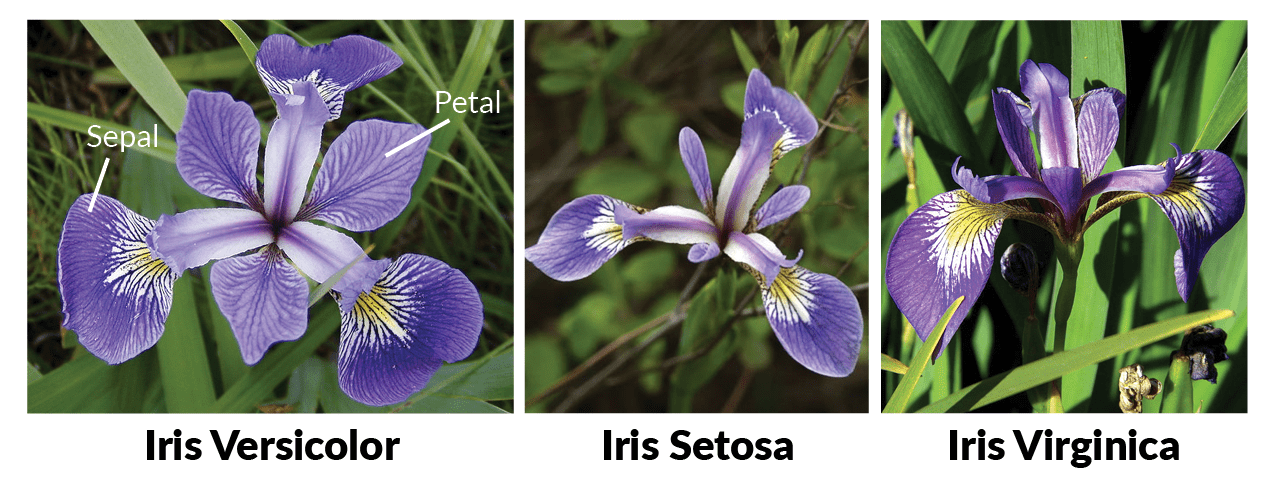

# Data Collection

In [3]:
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

df.rename(columns={"sepal length (cm)": "SEPAL_LENGHT",
                   "sepal width (cm)": "SEPAL_WIDTH",
                   "petal length (cm)": "PETAL_LENGHT",
                   "petal width (cm)": "PETAL_WIDTH",
                   "target": "TARGET"}, inplace=True)

df.head()


,SEPAL_LENGHT,SEPAL_WIDTH,PETAL_LENGHT,PETAL_WIDTH,TARGET
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEPAL_LENGHT  150 non-null    float64
 1   SEPAL_WIDTH   150 non-null    float64
 2   PETAL_LENGHT  150 non-null    float64
 3   PETAL_WIDTH   150 non-null    float64
 4   TARGET        150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


# Data Wrangling

In [5]:
#


In [6]:
df.replace(to_replace={'TARGET': {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}},
           inplace=True)
df = df.astype({'TARGET': 'category'})
df.head()


,SEPAL_LENGHT,SEPAL_WIDTH,PETAL_LENGHT,PETAL_WIDTH,TARGET
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
target_column = 'TARGET'


# Data Visualization

In [8]:
def update_datatypes_columns():
    numeric_features = df.select_dtypes(include=np.number).columns.to_list()

    continuous_features = df.select_dtypes(include=float).columns.to_list()

    discrete_features = df.select_dtypes(include=int).columns.to_list()

    categorical_features = df.select_dtypes(
        include='category').columns.to_list()

    object_features = df.select_dtypes(include='object').columns.to_list()

    bool_features = df.select_dtypes(include=bool).columns.to_list()

    date_time_features = df.select_dtypes(
        include=np.datetime64).columns.to_list()

    time_delta_features = df.select_dtypes(
        include=np.timedelta64).columns.to_list()

    display({'numeric_features': ', '.join(numeric_features), 'continuous_features': ', '.join(continuous_features),
             'discrete_features': ', '.join(discrete_features), 'categorical_features': ', '.join(categorical_features),
             'object_features': ', '.join(object_features), 'bool_features': ', '.join(bool_features),
             'date_time_features': ', '.join(date_time_features), 'time_delta_features': ', '.join(time_delta_features)})

    return numeric_features, continuous_features, discrete_features, categorical_features, \
        object_features, bool_features, date_time_features, time_delta_features


numeric_features, continuous_features, discrete_features, categorical_features, object_features, \
    bool_features, date_time_features, time_delta_features = update_datatypes_columns()


{'numeric_features': 'SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH',
 'continuous_features': 'SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH',
 'discrete_features': '',
 'categorical_features': 'TARGET',
 'object_features': '',
 'bool_features': '',
 'date_time_features': '',
 'time_delta_features': ''}

## Statistical Summary

In [9]:
df.describe()


,SEPAL_LENGHT,SEPAL_WIDTH,PETAL_LENGHT,PETAL_WIDTH
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Correlation

### Dispersion Diagram

In [10]:
@interact(hue=[None] + categorical_features + bool_features,
          size=[None] + numeric_features,
          n_samples=IntSlider(value=150, min=150, max=150, step=1000))
def _(hue, size, n_samples):

    if hue != None and len(df[hue].unique()) > 20:
        print(f'Too many categories: {hue}={df[hue].unique()}')
        return

    _df = df.sample(n=n_samples, replace=False, random_state=23)

    sns.pairplot(data=_df, hue=hue, size=size, diag_kind='hist')

    plt.show()


interactive(children=(Dropdown(description='hue', options=(None, 'TARGET'), value=None), Dropdown(description=…

In [11]:
@interact(x=numeric_features,
          y=numeric_features,
          hue=[None] + categorical_features + bool_features,
          size=[None] + numeric_features,
          style=[None] + categorical_features + bool_features,
          alpha=FloatSlider(value=1, min=.1, max=1, step=.1),
          show=fixed(True), file_name=fixed(''))
def my_relplot(x, y, hue, size, style, alpha, show, file_name):

    if hue != None and len(df[hue].unique()) > 50:
        if show == True:
            print(f'Too many categories: {hue}={df[hue].unique()}')

        return

    if style != None and len(df[style].unique()) > 50:
        if show == True:
            print(f'Too many categories: {style}={df[style].unique()}')

        return

    chart = sns.relplot(data=df, x=x, y=y, hue=hue, size=size,
                        style=style, alpha=alpha, height=6)

    plt.title(f'{x} vs {y}', fontsize=12)

    if show == True:
        plt.show()
    else:
        chart.savefig(f'resources/EDA/{file_name}.png')
        plt.close()


interactive(children=(Dropdown(description='x', options=('SEPAL_LENGHT', 'SEPAL_WIDTH', 'PETAL_LENGHT', 'PETAL…

In [12]:
@interact(x=numeric_features,
          y=categorical_features + bool_features,
          hue=[None] + categorical_features + bool_features,
          orient=['v', 'h'],
          n_samples=IntSlider(value=1000, min=1000, max=50000, step=1000),
          show=fixed(True), file_name=fixed(''))
def my_swarmplot(x, y, hue, orient, n_samples, show, file_name):

    plt.rcParams['figure.figsize'] = (18, 6)

    if y == None:
        print('No existen variables categóricas o booleanas.')
        return

    if len(df[y].unique()) > 50:
        if show == True:
            print(f'Too many categories: {y}={df[y].unique()}')

        return

    if hue != None and len(df[hue].unique()) > 50:
        if show == True:
            print(f'Too many categories: {hue}={df[hue].unique()}')

        return

    _df = df.sample(n=n_samples, replace=True, random_state=23)

    if orient == 'v':
        x, y = y, x

    chart = sns.swarmplot(data=_df, x=x, y=y, hue=hue, orient=orient, size=3)

    plt.title(f'{y} by {x}', fontsize=12)

    if show == True:
        plt.show()
    else:
        chart.get_figure().savefig(f'resources/EDA/{file_name}.png')
        plt.close()


interactive(children=(Dropdown(description='x', options=('SEPAL_LENGHT', 'SEPAL_WIDTH', 'PETAL_LENGHT', 'PETAL…

### Pearson Correlation

In [13]:
@interact(show=fixed(True), file_name=fixed(''))
def my_pearson(show, file_name):

    plt.rcParams['figure.figsize'] = (5, 5)

    matrix = df.corr(method='pearson', numeric_only=True)
    chart = sns.heatmap(data=matrix, annot=True, square=True, center=0)
    chart.set_xticklabels(chart.get_xticklabels(),
                          rotation=45, horizontalalignment='right')

    plt.title('Pearson Diagram', fontsize=12)

    if show == True:
        plt.show()
    else:
        chart.get_figure().savefig(f'resources/EDA/{file_name}.png')
        plt.close()


interactive(children=(Output(),), _dom_classes=('widget-interact',))

## Distributions

### Histogram

In [14]:
@interact(col=numeric_features,
          normal=False,
          stat=['count', 'frequency', 'probability', 'percent', 'density'],
          cumulative=False,
          hue=[None] + categorical_features + bool_features,
          kde=False,
          show=fixed(True), file_name=fixed(''))
def my_histplot(col, normal, stat, cumulative, hue, kde, show, file_name):

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6),
                           gridspec_kw={'width_ratios': [1, .3]})

    # ax1 -----------------------------------------------------------------------------------

    if normal == False:
        if hue != None and len(df[hue].unique()) > 50:
            if show == True:
                print(f'Too many categories: {hue}={df[hue].unique()}')

            plt.close()
            return

        chart = sns.histplot(data=df, ax=ax[0], x=col, hue=hue, stat=stat,
                             multiple='stack', cumulative=cumulative, kde=kde)
        chart.set(title='Histogram')
    else:
        try:
            # Valores de la media (mu) y desviación típica (sigma) de los datos
            mu, sigma = stats.norm.fit(data=df[col])

            chart = sns.histplot(data=df, ax=ax[0], x=col, stat='density')

            # Valores teóricos de la normal en el rango observado
            x_hat = np.linspace(min(df[col]), max(df[col]), num=100)
            y_hat = stats.norm.pdf(x_hat, mu, sigma)

            ax[0].plot(x_hat, y_hat, 'r', linewidth=2, label='normal')
            ax[0].legend()
        except Exception as e:
            chart = sns.histplot(data=df, ax=ax[0], x=col, stat=stat)
            print('ax_0 error:', e)

    # ax2 -----------------------------------------------------------------------------------

    try:
        fig = sm.qqplot(df[col], fit=True, line='q', alpha=0.4, lw=2, ax=ax[1])
    except Exception as e:
        print('ax_1 error:', e)

    # ---------------------------------------------------------------------------------------

    if show == False:
        chart.get_figure().savefig(f'resources/EDA/{file_name}.png')
        plt.close()
        return

    kurtosis, skew = stats.kurtosis(df[col]), stats.skew(df[col])
    kurtosis, skew = round(kurtosis, 2), round(skew, 2)

    if skew < -1 or skew > 1:
        print(f'- La distribución está muy sesgada (skew={skew}).')
    elif -1 <= skew < -0.5 or 0.5 < skew <= 1:
        print(f'- La distribución está moderadamente sesgada (skew={skew}).')
    elif -0.5 <= skew <= 0.5:
        print(f'- La distribución es aproximadamente simétrica (skew={skew}).')

    if kurtosis < -0.5:
        print(
            f'- La distribución platicúrtica (kurtosis={kurtosis}), ', end='')
        print('existe una baja concentración de los valores en torno a su media.')
    if kurtosis > 0.5:
        print(f'- La distribución leptocúrtica (kurtosis={kurtosis}) ', end='')
        print('existe una gran concentración de los valores en torno a su media.')
    if -0.5 <= kurtosis <= 0.5:
        print(f'- La distribución mesocúrtica (kurtosis={kurtosis}) ', end='')
        print('existe una concentración normal de los valores en torno a su media.')

    plt.show()


interactive(children=(Dropdown(description='col', options=('SEPAL_LENGHT', 'SEPAL_WIDTH', 'PETAL_LENGHT', 'PET…

### Probability Mass Function (PMF)

In [15]:
@interact(column=discrete_features, normalize=False)
def my_pmf(column, normalize):

    if column == None:
        print('No existen variables discretas.')
        return

    plt.rcParams['figure.figsize'] = (10, 6)

    data = df[column].value_counts(normalize=normalize)

    data = pd.DataFrame({'INDEX': data.index,
                         'VALUE': data.values}).sort_values(by=['INDEX'])

    plt.plot(data['INDEX'], data['VALUE'], '--')
    plt.vlines(data['INDEX'], 0, data['VALUE'], colors='b', lw=5, alpha=0.5)

    plt.title('Función de Masa de Probabilidad', fontsize=12)
    plt.ylabel('Density' if normalize else 'Count')
    plt.xlabel(column)
    plt.show()


interactive(children=(Dropdown(description='column', options=(), value=None), Checkbox(value=False, descriptio…

In [16]:
@interact(x=numeric_features,
          y=numeric_features,
          hue=[None] + categorical_features + bool_features,
          kind=['scatter', 'kde', 'hist', 'hex', 'reg', 'resid'],
          show=fixed(True), file_name=fixed(''))
def my_jointplot(x, y, hue, kind, show, file_name):

    if hue != None and len(df[hue].unique()) > 50:
        if show == True:
            print(f'Too many categories: {hue}={df[hue].unique()}')

        return

    chart = sns.jointplot(data=df, x=x, y=y, hue=hue, kind=kind, height=6)

    if show == True:
        plt.show()
    else:
        chart.savefig(f'resources/EDA/{file_name}.png')
        plt.close()


interactive(children=(Dropdown(description='x', options=('SEPAL_LENGHT', 'SEPAL_WIDTH', 'PETAL_LENGHT', 'PETAL…

### Box - Violin Plot

In [17]:
@interact(col=[None] + numeric_features,
          violin=False,
          orient=['v', 'h'],
          show=fixed(True), file_name=fixed(''))
def my_boxplot(col, violin, orient, show, file_name):

    if col is None:
        plt.rcParams['figure.figsize'] = (16, 8)
    else:
        plt.rcParams['figure.figsize'] = (6, 2)

    if violin:
        chart = sns.violinplot(data=df, x=col, orient=orient)
        plt.title('Violin Plot', fontsize=12)
    else:
        chart = sns.boxplot(data=df, x=col, orient=orient)
        plt.title('Box Plot', fontsize=12)

    if show == True:
        plt.show()
    else:
        chart.get_figure().savefig(f'resources/EDA/{file_name}.png')
        plt.close()


interactive(children=(Dropdown(description='col', options=(None, 'SEPAL_LENGHT', 'SEPAL_WIDTH', 'PETAL_LENGHT'…

In [18]:
@interact(x=categorical_features + bool_features,
          y=numeric_features,
          hue=[None] + bool_features,
          violin=False,
          split=False,
          orient=['v', 'h'],
          show_points=False,
          show=fixed(True), file_name=fixed(''))
def my_violinplot(x, y, hue, violin, split, orient, show_points, show, file_name):

    if x == None:
        print('No existen variables categóricas o booleanas.')
        return

    if len(df[x].unique()) > 50:
        if show == True:
            print(f'Too many categories: {x}={df[x].unique()}')

        return

    x_org = x
    if orient == 'h':
        x, y = y, x

    if show_points == True:
        chart = sns.stripplot(data=df, x=x, y=y, color='.3', size=3)

    plt.rcParams['figure.figsize'] = (10, 6)

    if violin:
        chart = sns.violinplot(x=x, y=y, data=df, hue=hue,
                               split=split, orient=orient)
        plt.title(f'Violin Plot by {x_org}', fontsize=12)
    else:
        chart = sns.boxplot(x=x, y=y, data=df, hue=hue, orient=orient)
        plt.title(f'Box Plot by {x_org}', fontsize=12)

    sns.despine(offset=10, trim=True)

    if show == True:
        plt.show()
    else:
        chart.get_figure().savefig(f'resources/EDA/{file_name}.png')
        plt.close()


interactive(children=(Dropdown(description='x', options=('TARGET',), value='TARGET'), Dropdown(description='y'…

## Contingency Table

In [19]:
@interact(index=categorical_features + bool_features,
          columns=categorical_features + bool_features,
          values=numeric_features,
          annot=False,
          agg_func=['count', 'mean', 'median', 'sum', 'std', 'probability'],
          show=fixed(True), file_name=fixed(''))
def my_contingency(index, columns, values, annot, agg_func, show, file_name):

    plt.rcParams['figure.figsize'] = (8, 8)

    if index == None:
        print('No existen variables categóricas.')
        return

    if index == columns:
        sns.displot(data=df, x=index)
        plt.show()
        return

    if len(df[index].unique()) > 50:
        if show == True:
            print(f'Too many categories: {index}={df[index].unique()}')

        return

    if len(df[columns].unique()) > 50:
        if show == True:
            print(f'Too many categories: {columns}={df[columns].unique()}')

        return

    agg_func_aux = 'count' if agg_func == 'probability' else agg_func
    contingency_table = df.pivot_table(index=index, columns=columns, values=values,
                                       aggfunc=agg_func_aux, fill_value=0).dropna(axis=0, how='all')

#     display(contingency_table)

    if agg_func == 'probability':
        contingency_table = contingency_table.astype(float).div(contingency_table.sum(axis=1),
                                                                axis=0)
        fmt = '.2%'
    else:
        fmt = 'g'

    chart = sns.heatmap(data=contingency_table,
                        annot=annot, fmt=fmt, square=True)
    chart.set_xticklabels(chart.get_xticklabels(),
                          rotation=45, horizontalalignment='right')

    if agg_func == 'count':
        plt.title(f'Contingency Table ({agg_func})', fontsize=12)
    else:
        plt.title(f'Contingency Table ({agg_func} {values})', fontsize=12)

    if show == True:
        plt.show()
    else:
        chart.get_figure().savefig(f'resources/EDA/{file_name}.png')
        plt.close()


interactive(children=(Dropdown(description='index', options=('TARGET',), value='TARGET'), Dropdown(description…

## Statistics

In [20]:
@interact(x=categorical_features + bool_features,
          y=numeric_features,
          hue=[None] + categorical_features + bool_features,
          estimator=['mean', 'count', 'median', 'sum', 'std'],
          kind=['bar', 'strip', 'box', 'violin', 'boxen', 'point'],
          orient=['v', 'h'],
          show=fixed(True), file_name=fixed(''))
def my_catplot(x, y, hue, estimator, kind, orient, show, file_name):

    if x == None:
        print('No existen variables categóricas.')
        return

    if len(df[x].unique()) > 50:
        if show == True:
            print(f'Too many categories: {x}={df[x].unique()}')

        return

    if hue != None and len(df[hue].unique()) > 5:
        if show == True:
            print(f'Too many categories: {hue}={df[hue].unique()}')

        return

    if orient == 'h':
        x, y = y, x

    chart = sns.catplot(data=df, x=x, y=y, hue=hue, estimator=estimator, kind=kind,
                        orient=orient, errorbar=None, height=6, aspect=2.5)
    chart.despine(left=True)

    if estimator == 'count':
        chart.set(ylabel='count')

    plt.title(f'Statistics ({estimator})', fontsize=12)

    if show == True:
        plt.show()
    else:
        chart.savefig(f'resources/EDA/{file_name}.png')
        plt.close()


interactive(children=(Dropdown(description='x', options=('TARGET',), value='TARGET'), Dropdown(description='y'…

In [21]:
@interact(col=categorical_features, show=fixed(True), file_name=fixed(''))
def my_pie(col, show, file_name):

    if col == None:
        print('No existen variables categóricas.')
        return

    plt.rcParams['figure.figsize'] = (8, 8)

    labels = df[col].value_counts().index.values
    sizes = df[col].value_counts().values
    explode = np.full(df[col].value_counts().count(), 0.1)

    _, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels,
            autopct='%1.1f%%', shadow=True, startangle=90)
    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.axis('equal')

    plt.title(f'{col}', fontsize=12)

    if show == True:
        plt.show()
    else:
        plt.savefig(f'resources/EDA/{file_name}.png')
        plt.close()


interactive(children=(Dropdown(description='col', options=('TARGET',), value='TARGET'), Output()), _dom_classe…

## Time

In [22]:
@interact(x=date_time_features,
          y=numeric_features,
          agg_func=['count', 'mean', 'median', 'sum'],
          hue=[None] + categorical_features + bool_features,
          style=0,
          show=fixed(True), file_name=fixed(''))
def my_lineplot(x, y, agg_func, hue, style, show, file_name):
    if x == None:
        print('No existen variables de tiempo.')
        return

    if hue is not None and len(df[hue].unique()) > 20:
        if show == True:
            print(f'Too many categories: {hue}={df[hue].unique()}')

        return

    plt.figure(figsize=(18, 8))

    by = [hue, x] if hue is not None else x
    data = df.groupby(by)[y].agg(agg_func).reset_index()

#     display(data.head())

    chart = sns.lineplot(data=data, x=x, y=y, hue=hue,
                         style=hue if style == True else None, linewidth=0.5)

    if agg_func == 'count':
        chart.set(ylabel='count')

    plt.title(f'Daily ({agg_func})', fontsize=12)

    if show == True:
        plt.show()
    else:
        chart.get_figure().savefig(f'resources/EDA/{file_name}.png')
        plt.close()


interactive(children=(Dropdown(description='x', options=(), value=None), Dropdown(description='y', options=('S…

## Map

In [23]:
#


# Data Cleaning & Transform

In [24]:
n = df.shape[0]

# Completely empty rows are removed.
# In case you want to delete the row if any of its values is missing, use 'any' in the 'how' parameter
# Use subset['col1', 'col2'] if you want to apply to some columns only.
df.dropna(axis=0, how='all', inplace=True)

df.drop_duplicates(keep='first', inplace=True)

print(f'Eliminados: {df.shape[0] - n}')
df.shape


Eliminados: -1


(149, 5)

## Cardinality

In [25]:
n_records = len(df)


def duplicate_column_values(df):
    resume = pd.DataFrame(columns=['VARIABLE', 'DATA_TYPE',
                                   'MORE_COMMON_VAL', 'MORE_COMMON_QTY', 'MORE_COMMON_PERC',
                                   'LESS_COMMON_VAL', 'LESS_COMMON_QTY', 'LESS_COMMON_PERC'])

    for column in df.columns:
        n_per_value = df[column].value_counts(dropna=False)
        more_common_qty = n_per_value.iloc[0]
        less_common_qty = n_per_value.iloc[-1]

        new_df = pd.DataFrame(data={'VARIABLE': [column],
                                    'DATA_TYPE': [df[column].dtype],
                                    'MORE_COMMON_VAL': [n_per_value.index[0]],
                                    'MORE_COMMON_QTY': [more_common_qty],
                                    'MORE_COMMON_PERC': [round(more_common_qty * 100 / (1.0 * n_records), 3)],
                                    'LESS_COMMON_VAL': [n_per_value.index[-1]],
                                    'LESS_COMMON_QTY': [less_common_qty],
                                    'LESS_COMMON_PERC': [round(less_common_qty * 100 / (1.0 * n_records), 3)]})

        resume = pd.concat([resume, new_df], ignore_index=True)

    return resume


resume = duplicate_column_values(df)
resume


,VARIABLE,DATA_TYPE,MORE_COMMON_VAL,MORE_COMMON_QTY,MORE_COMMON_PERC,LESS_COMMON_VAL,LESS_COMMON_QTY,LESS_COMMON_PERC
0,SEPAL_LENGHT,float64,5.0,10,6.711,7.9,1,0.671
1,SEPAL_WIDTH,float64,3.0,26,17.450,2.0,1,0.671
2,PETAL_LENGHT,float64,1.4,13,8.725,6.4,1,0.671
3,PETAL_WIDTH,float64,0.2,29,19.463,0.5,1,0.671
4,TARGET,category,Setosa,50,33.557,Virginica,49,32.886


In [26]:
resume = resume.loc[(resume.MORE_COMMON_PERC > 90.) |
                    ((resume.MORE_COMMON_PERC > 25.) & (resume.MORE_COMMON_VAL.isna()))]
resume


,VARIABLE,DATA_TYPE,MORE_COMMON_VAL,MORE_COMMON_QTY,MORE_COMMON_PERC,LESS_COMMON_VAL,LESS_COMMON_QTY,LESS_COMMON_PERC


In [27]:
for col in resume.VARIABLE.values:
    display(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------------------')


- No existen columnas para eliminar.

In [28]:
df.drop(labels=[], axis=1, inplace=True)

numeric_features, continuous_features, discrete_features, categorical_features, object_features, \
    bool_features, date_time_features, time_delta_features = update_datatypes_columns()


{'numeric_features': 'SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH',
 'continuous_features': 'SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH',
 'discrete_features': '',
 'categorical_features': 'TARGET',
 'object_features': '',
 'bool_features': '',
 'date_time_features': '',
 'time_delta_features': ''}

## Outliers

In [29]:
def build_outliers_resume():
    resume = pd.DataFrame(columns=['VARIABLE', 'OUTLIER', 'FREQUENCY',
                                   'UNIQUE_OUTLIERS', 'UNIQUE_VALUES', 'DATA_TYPE'])
    resume.OUTLIER = resume.OUTLIER.astype(bool)

    for col in numeric_features + bool_features:
        # zcores absoluto de cada valor de la columna seleccionada
        zcores = np.abs(stats.zscore(df[col]))

        # TODO: Probar con 1.5 luego, así funcionan los boxplots
        outliers = df[zcores > 3][col].values
        n_outliers = len(outliers)

        new_df = pd.DataFrame(data={'VARIABLE': [col],
                                    'OUTLIER': [False if n_outliers == 0 else True],
                                    'FREQUENCY': [n_outliers],
                                    'UNIQUE_OUTLIERS': [set(outliers)],
                                    'UNIQUE_VALUES': [df[col].unique()],
                                    'DATA_TYPE': [df[col].dtype]})

        resume = pd.concat([resume, new_df], ignore_index=True, axis=0)

    return resume


outliers_resume_df = build_outliers_resume()
outliers_resume_df


,VARIABLE,OUTLIER,FREQUENCY,UNIQUE_OUTLIERS,UNIQUE_VALUES,DATA_TYPE
0,SEPAL_LENGHT,False,0,{},"[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, ...",float64
1,SEPAL_WIDTH,True,1,{4.4},"[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, ...",float64
2,PETAL_LENGHT,False,0,{},"[1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, ...",float64
3,PETAL_WIDTH,False,0,{},"[0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, ...",float64


- Se sustituyen los outliers por NaN. 
- Las columnas `discretas` se convierte automáticamente a `continuas` ya que NaN es un valor continuo.
- Analizar detalladamente cada columna, a no todas se le aplican los cambios. 
- No se actualiza la columna objetivo.

In [30]:
class IrisOutlierTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ops = ['SEPAL_LENGHT', 'SEPAL_WIDTH',
                    'PETAL_LENGHT', 'PETAL_WIDTH']

    def fit(self, X, y=None):
        self.sts = {col: {'mean': X[col].mean(), 'std': X[col].std()}
                    for col in self.ops}

        return self

    def transform(self, X):
        X = X.copy()

        for col in self.ops:
            zcores = \
                np.abs((X[col] - self.sts[col]['mean']) / self.sts[col]['std'])
            idx = zcores[zcores > 3].index

            X.loc[idx, col] = np.nan

        # X.loc[~X[''].isin([0, 1]), ''] = None

        return X

    def get_inv_transf_df(self, X):
        return X[self.ops + []]

    def inverse_transform(self, X, inv_df):
        X = X.copy()
        X[self.ops + []] = inv_df

        return X


dill.dump(IrisOutlierTransformer,
          open('resources/outlier_transformer', 'wb'))

outlier_transf = IrisOutlierTransformer()
inv_outlier_transf_df = outlier_transf.get_inv_transf_df(df)
display(inv_outlier_transf_df.head())
df = outlier_transf.fit_transform(df)
df.head()


,SEPAL_LENGHT,SEPAL_WIDTH,PETAL_LENGHT,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,SEPAL_LENGHT,SEPAL_WIDTH,PETAL_LENGHT,PETAL_WIDTH,TARGET
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [31]:
build_outliers_resume()


,VARIABLE,OUTLIER,FREQUENCY,UNIQUE_OUTLIERS,UNIQUE_VALUES,DATA_TYPE
0,SEPAL_LENGHT,False,0,{},"[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, ...",float64
1,SEPAL_WIDTH,False,0,{},"[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, ...",float64
2,PETAL_LENGHT,False,0,{},"[1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, ...",float64
3,PETAL_WIDTH,False,0,{},"[0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, ...",float64


## Imputers

In [32]:
def build_imputers_resume():
    resume = pd.DataFrame()

    for column in df.columns:
        resume.loc[column, 'TYPE'] = df[column].dtype
        resume.loc[column, 'VALUES'] = str(df[column].unique())
        resume.loc[column, 'VALUES_LEN'] = len(df[column].unique())
        resume.loc[column, 'NULL_COUNT'] = df[column].isnull().sum(axis=0)

    return resume


build_imputers_resume()


,TYPE,VALUES,VALUES_LEN,NULL_COUNT
SEPAL_LENGHT,float64,[5.1 4.9 4.7 4.6 5. 5.4 4.4 4.8 4.3 5.8 5.7 5...,35.0,0.0
SEPAL_WIDTH,float64,[3.5 3. 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4. nan 3...,23.0,1.0
PETAL_LENGHT,float64,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1. 1.9 4.7 4.5 4...,43.0,0.0
PETAL_WIDTH,float64,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1. 1...,22.0,0.0
TARGET,category,"['Setosa', 'Versicolor', 'Virginica']\nCategor...",3.0,0.0


In [33]:
idx = df[df[target_column].isna()].index
df.drop(axis=0, index=idx, inplace=True)


In [34]:
class IrisImputeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.ops = {'SEPAL_LENGHT': X['SEPAL_LENGHT'].median(),
                    'SEPAL_WIDTH': X['SEPAL_WIDTH'].median(),
                    'PETAL_LENGHT': X['PETAL_LENGHT'].median(),
                    'PETAL_WIDTH': X['PETAL_WIDTH'].median()}

        return self

    def transform(self, X):
        X = X.copy()

        for k in self.ops:
            X[k].fillna(value=self.ops[k], inplace=True)

        return X

    def get_inv_transf_df(self, X):
        return X[self.ops.keys()]

    def inverse_transform(self, X, inv_df):
        X = X.copy()
        X[list(self.ops.keys())] = inv_df

        return X


dill.dump(IrisImputeTransformer,
          open('resources/impute_transformer', 'wb'))


impute_transf = IrisImputeTransformer()
impute_transf.fit(df)
inv_impute_transf_df = impute_transf.get_inv_transf_df(df)
display(inv_impute_transf_df.head())
df = impute_transf.transform(df)
df.head()


,SEPAL_LENGHT,SEPAL_WIDTH,PETAL_LENGHT,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,SEPAL_LENGHT,SEPAL_WIDTH,PETAL_LENGHT,PETAL_WIDTH,TARGET
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [35]:
build_imputers_resume()


,TYPE,VALUES,VALUES_LEN,NULL_COUNT
SEPAL_LENGHT,float64,[5.1 4.9 4.7 4.6 5. 5.4 4.4 4.8 4.3 5.8 5.7 5...,35.0,0.0
SEPAL_WIDTH,float64,[3.5 3. 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4. 3.8 3...,22.0,0.0
PETAL_LENGHT,float64,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1. 1.9 4.7 4.5 4...,43.0,0.0
PETAL_WIDTH,float64,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1. 1...,22.0,0.0
TARGET,category,"['Setosa', 'Versicolor', 'Virginica']\nCategor...",3.0,0.0


## Transform

In [36]:
class IrisDataTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.features = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        X['pos'] = range(0, X.shape[0])   # Para obtener la posicion
        bar = ProgressBar(maxval=X.shape[0]).start()

        if len(self.features) == 0:
            pass
        elif len(self.features) == 1:
            X[self.features[0]] = X.apply(self.__transform, args=(bar,),
                                          axis=1)
        else:
            X[self.features] = X.apply(self.__transform, args=(bar,),
                                       axis=1, result_type='expand')

        bar.finish()
        X.drop(labels='pos', axis=1, inplace=True)

        return X

    def __transform(self, row, bar):
        # code

        bar.update(row.pos+1)
        return model

    def get_inv_transf_df(self, X):
        return X[self.features]

    def inverse_transform(self, X, inv_df):
        X = X.copy()
        X[self.features] = inv_df

        return X


dill.dump(IrisDataTransformer,
          open('resources/data_transformer', 'wb'))

data_transf = IrisDataTransformer()
inv_data_transf_df = data_transf.get_inv_transf_df(df)
display(inv_data_transf_df.head())
df = data_transf.fit_transform(df)
df.head()


""
0
1
2
3
4


100% |########################################################################|


,SEPAL_LENGHT,SEPAL_WIDTH,PETAL_LENGHT,PETAL_WIDTH,TARGET
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Data Types

In [37]:
type_resume = pd.DataFrame()

for column in df.columns:
    type_resume.loc[column, 'TYPE'] = df[column].dtype
    type_resume.loc[column, 'VALUES'] = str(df[column].unique())
    type_resume.loc[column, 'VALUES_LEN'] = len(df[column].unique())

type_resume


,TYPE,VALUES,VALUES_LEN
SEPAL_LENGHT,float64,[5.1 4.9 4.7 4.6 5. 5.4 4.4 4.8 4.3 5.8 5.7 5...,35.0
SEPAL_WIDTH,float64,[3.5 3. 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4. 3.8 3...,22.0
PETAL_LENGHT,float64,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1. 1.9 4.7 4.5 4...,43.0
PETAL_WIDTH,float64,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1. 1...,22.0
TARGET,category,"['Setosa', 'Versicolor', 'Virginica']\nCategor...",3.0


In [38]:
#

numeric_features, continuous_features, discrete_features, categorical_features, object_features, \
    bool_features, date_time_features, time_delta_features = update_datatypes_columns()


{'numeric_features': 'SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH',
 'continuous_features': 'SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH',
 'discrete_features': '',
 'categorical_features': 'TARGET',
 'object_features': '',
 'bool_features': '',
 'date_time_features': '',
 'time_delta_features': ''}

## Multicollinearity

In [39]:
def vif_calc(df):
    vif_data = pd.DataFrame()
    vif_data['FEAUTURE'] = df.columns

    vif_data['VIF'] = [variance_inflation_factor(df.values, i)
                       for i in range(len(df.columns))]

    return vif_data


def vif_excec(df):
    features = set(numeric_features) - {''}
    features = list(features)
    exclude_features = list(set(df.columns) - set(features))

    include_df, exclude_df = df[features], df[exclude_features]

    while True:
        vif_data = vif_calc(include_df)

        big_vif = vif_data[vif_data.VIF >= 5].sort_values(by='VIF',
                                                          ascending=False).head(1)

        if big_vif.shape[0] > 0:
            feature_vif = big_vif.iloc[0]['FEAUTURE']
            vif_value = str(big_vif.iloc[0]['VIF'])

            features.remove(feature_vif)
            include_df = include_df[features]

            print(f'Removed {feature_vif} with VIF={vif_value}.')
        else:
            break

    df = include_df.merge(right=exclude_df, how='inner',
                          left_index=True, right_index=True, validate='1:1')

    return df


- Si se desea usar VIF (Variance Inflation Factor), se debe utilizar el dataframe original.
- Se hace una copia para ver su funcionamiento.
- También se puede incluir las variables generadas a partir de los datos categóricos.
- No siempre se obtienen mejores resultados aplicando VIF.

In [40]:
# Para observar su funcionamiento.
vif_excec(df).head()

# Aplica los cambios.
# df = vif_excec(df, target_column)

# numeric_features, continuous_features, discrete_features, categorical_features, object_features, \
#     bool_features, date_time_features, time_delta_features = update_datatypes_columns()

# df.head()


Removed SEPAL_LENGHT with VIF=242.38704621423335.
Removed PETAL_LENGHT with VIF=62.15374545038016.


,SEPAL_WIDTH,PETAL_WIDTH,TARGET
0,3.5,0.2,Setosa
1,3.0,0.2,Setosa
2,3.2,0.2,Setosa
3,3.1,0.2,Setosa
4,3.6,0.2,Setosa


# Exploratory Data Analysis (EDA)

Se crean variables categóricas auxiliares a partir de las variables numéricas.

We have 2 options to group the values.
- cut: The space between the groups are equal and the frequencies of each group are different.
- qcut: The space between the groups are different and the frequencies of each group are equal.

To make containers with very different data less likely we use qcut.

In [41]:
desc_resume = pd.DataFrame()

for column in set(numeric_features) - {''}:
    desc_resume.loc[column, 'TYPE'] = df[column].dtype
    desc_resume.loc[column, 'VALUES'] = str(df[column].unique())
    desc_resume.loc[column, 'VALUES_LEN'] = len(df[column].unique())
    desc_resume.loc[column, 'MIN'] = df[column].min()
    desc_resume.loc[column, 'MAX'] = df[column].max()

desc_resume


,TYPE,VALUES,VALUES_LEN,MIN,MAX
SEPAL_WIDTH,float64,[3.5 3. 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4. 3.8 3...,22.0,2.0,4.2
PETAL_LENGHT,float64,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1. 1.9 4.7 4.5 4...,43.0,1.0,6.9
PETAL_WIDTH,float64,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1. 1...,22.0,0.1,2.5
SEPAL_LENGHT,float64,[5.1 4.9 4.7 4.6 5. 5.4 4.4 4.8 4.3 5.8 5.7 5...,35.0,4.3,7.9


In [42]:
@interact(col=set(numeric_features) - {''})
def my_boxplot(col):

    plt.rcParams['figure.figsize'] = (8, 2)

    chart = sns.boxplot(data=df, x=col)
    plt.title('Box Plot', fontsize=12)

    plt.show()


interactive(children=(Dropdown(description='col', options=('SEPAL_WIDTH', 'PETAL_LENGHT', 'PETAL_WIDTH', 'SEPA…

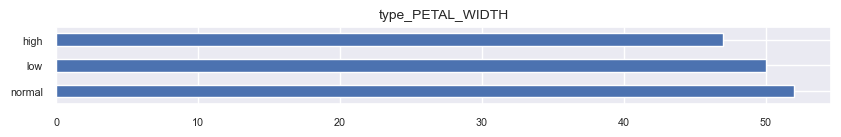

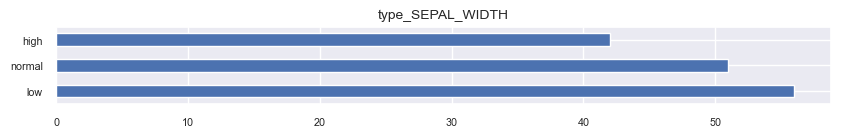

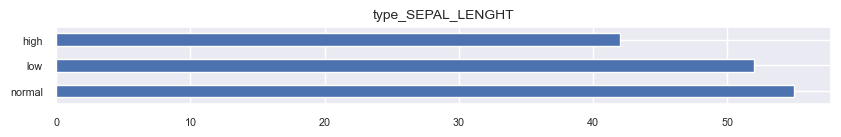

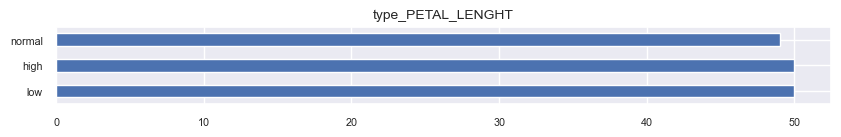

{'numeric_features': 'SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH',
 'continuous_features': 'SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH',
 'discrete_features': '',
 'categorical_features': 'TARGET, type_PETAL_WIDTH, type_SEPAL_WIDTH, type_SEPAL_LENGHT, type_PETAL_LENGHT',
 'object_features': '',
 'bool_features': '',
 'date_time_features': '',
 'time_delta_features': ''}

,SEPAL_LENGHT,SEPAL_WIDTH,PETAL_LENGHT,PETAL_WIDTH,TARGET,type_PETAL_WIDTH,type_SEPAL_WIDTH,type_SEPAL_LENGHT,type_PETAL_LENGHT
0,5.1,3.5,1.4,0.2,Setosa,low,high,low,low
1,4.9,3.0,1.4,0.2,Setosa,low,normal,low,low
2,4.7,3.2,1.3,0.2,Setosa,low,normal,low,low
3,4.6,3.1,1.5,0.2,Setosa,low,normal,low,low
4,5.0,3.6,1.4,0.2,Setosa,low,high,low,low


In [43]:
# Si no existe una clasificación brindada por el negocio, se realiza una agrupación natural (qcut-cut).
# Ejemplo:
#  Edad: [0-7): niño, [8-18): adolescente, [70-120]: 3ra edad


types_2 = ['low', 'high']
types_3 = ['low', 'normal', 'high']
types_5 = ['very low', 'low', 'moderate', 'high', 'very high']

pref = 'type_'  # Para optimizar los gráficos que de generarán a continuación.

# Columns created are added to delete later.
type_columns = [
    (f'{pref}PETAL_WIDTH', 'PETAL_WIDTH', types_3),
    (f'{pref}SEPAL_WIDTH', 'SEPAL_WIDTH', types_3),
    (f'{pref}SEPAL_LENGHT', 'SEPAL_LENGHT', types_3),
    (f'{pref}PETAL_LENGHT', 'PETAL_LENGHT', types_3)]

for col in type_columns:
    plt.rcParams['figure.figsize'] = (10, len(col[2])/3)

    df[col[0]] = pd.qcut(x=df[col[1]], q=len(col[2]), labels=col[2])
#     df[col[0]] = pd.cut(x=df[col[1]], bins=len(col[2]), labels=col[2])

    df[col[0]].value_counts().plot(kind='barh')
    plt.title(col[0], fontsize=10)
    plt.show()

numeric_features, continuous_features, discrete_features, categorical_features, object_features, \
    bool_features, date_time_features, time_delta_features = update_datatypes_columns()

df.head()


In [44]:
date_columns = []

for col in date_time_features:
    dw, d, m = f'{col}_day_of_week', f'{col}_day', f'{col}_month'
    date_columns = date_columns + [dw, d, m]

    df[dw] = pd.DatetimeIndex(df[col]).dayofweek.astype('category')
    df[d] = pd.DatetimeIndex(df[col]).day.astype('category')
    df[m] = pd.DatetimeIndex(df[col]).month.astype('category')

numeric_features, continuous_features, discrete_features, categorical_features, object_features, \
    bool_features, date_time_features, time_delta_features = update_datatypes_columns()

df.head()


{'numeric_features': 'SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH',
 'continuous_features': 'SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH',
 'discrete_features': '',
 'categorical_features': 'TARGET, type_PETAL_WIDTH, type_SEPAL_WIDTH, type_SEPAL_LENGHT, type_PETAL_LENGHT',
 'object_features': '',
 'bool_features': '',
 'date_time_features': '',
 'time_delta_features': ''}

,SEPAL_LENGHT,SEPAL_WIDTH,PETAL_LENGHT,PETAL_WIDTH,TARGET,type_PETAL_WIDTH,type_SEPAL_WIDTH,type_SEPAL_LENGHT,type_PETAL_LENGHT
0,5.1,3.5,1.4,0.2,Setosa,low,high,low,low
1,4.9,3.0,1.4,0.2,Setosa,low,normal,low,low
2,4.7,3.2,1.3,0.2,Setosa,low,normal,low,low
3,4.6,3.1,1.5,0.2,Setosa,low,normal,low,low
4,5.0,3.6,1.4,0.2,Setosa,low,high,low,low


Se pueden generar los principales gráficos en la carpeta `EDA` para luego analizarlos.

In [45]:
# El multihilo no funciona más rápido y tiene problemas al pintar los gráficos.

# False: Calcula la cantidad de imágenes aproximadas que se generarán.
# True: Genera las imágenes (demora más).
paint = False

count = 0

print(f'Step 01: {count} generated graphs.')

for i, x in enumerate(numeric_features):
    for j, y in enumerate(numeric_features):
        if j <= i:
            continue

        for hue in [None] + categorical_features + bool_features:
            if hue in [f'type_{x}', f'type_{y}']:
                continue

            if paint == True:
                my_relplot(x, y, hue, size=None, style=None, alpha=1,
                           show=False, file_name=str(count).zfill(5))

            count += 1

print(f'Step 02: {count} generated graphs.')

for x in numeric_features:
    for y in categorical_features + bool_features:
        for hue in [None] + categorical_features + bool_features:

            if f'type_{x}' in [y, hue] or y == hue:
                continue

            if paint == True:
                my_swarmplot(x, y, hue, orient='v', n_samples=1000,
                             show=False, file_name=str(count).zfill(5))

            count += 1

print(f'Step 03: {count} generated graphs.')

if paint == True:
    my_pearson(show=False, file_name=str(count).zfill(5))
    count += 1

print(f'Step 04: {count} generated graphs.')

for col in numeric_features:
    if paint == True:
        my_histplot(col, normal=False, stat='count', cumulative=False, hue=None, kde=False,
                    show=False, file_name=str(count).zfill(5))

    count += 1

print(f'Step 05: {count} generated graphs.')

for col in [None] + numeric_features:
    for violin in [False, True]:
        if paint == True:
            my_boxplot(col, violin, orient='v', show=False,
                       file_name=str(count).zfill(5))

        count += 1

print(f'Step 06: {count} generated graphs.')

for x in categorical_features + bool_features:
    for y in numeric_features:
        for hue in [None] + bool_features:
            if paint == True:
                my_violinplot(x, y, hue, violin=False, split=False, orient='v', show_points=False,
                              show=False, file_name=str(count).zfill(5))

            count += 1

print(f'Step 07: {count} generated graphs.')

for i, index in enumerate(categorical_features + bool_features):
    for j, columns in enumerate(categorical_features + bool_features):
        if j <= i:
            continue

        # Para my_contingency con agg_func='count' se obtienen los mismos resultados sin importar el values seleccionado.
        if paint == True:
            my_contingency(index, columns, values=numeric_features[0], annot=True, agg_func='count',
                           show=False, file_name=str(count).zfill(5))

        count += 1

        for k, values in enumerate(numeric_features):
            if paint == True:
                my_contingency(index, columns, values, annot=True, agg_func='mean',
                               show=False, file_name=str(count).zfill(5))

            count += 1

print(f'Step 08: {count} generated graphs.')

for x in categorical_features + bool_features:
    for y in numeric_features:
        for hue in [None] + categorical_features + bool_features:
            if f'type_{y}' in [x, hue] or x == hue:
                continue

            if paint == True:
                my_catplot(x, y, hue, estimator='mean', kind='bar', orient='v',
                           show=False, file_name=str(count).zfill(5))

            count += 1

print(f'Step 09: {count} generated graphs.')

for col in categorical_features:
    if paint == True:
        my_pie(col, show=False, file_name=str(count).zfill(5))

    count += 1

print(f'Step 10: {count} generated graphs.')

for x in date_time_features:
    if len(numeric_features) > 0:
        y = numeric_features[0]

        for hue in [None] + categorical_features + bool_features:
            if paint == True:
                my_lineplot(x, y, agg_func='count', hue=hue, style=False,
                            show=False, file_name=str(count).zfill(5))

            count += 1

    for y in numeric_features:
        for hue in [None] + categorical_features + bool_features:
            if paint == True:
                my_lineplot(x, y, agg_func='mean', hue=hue, style=False,
                            show=False, file_name=str(count).zfill(5))

            count += 1

print(f'Step 11: {count} generated graphs.')


Step 01: 0 generated graphs.
Step 02: 24 generated graphs.
Step 03: 88 generated graphs.
Step 04: 88 generated graphs.
Step 05: 92 generated graphs.
Step 06: 102 generated graphs.
Step 07: 122 generated graphs.
Step 08: 172 generated graphs.
Step 09: 236 generated graphs.
Step 10: 241 generated graphs.
Step 11: 241 generated graphs.


- Se debe ejecutar nuevamente las celdas del apartado `Data Visualization` para que se actualicen las columnas del dataset luego de su limpieza en el apartado `Data Cleaning`.
- `Data Visualization` se encuentra primero que `Data Cleaning` para que éste último sustente sus cambios a partir del gráfico generado con los valores sin limpiar.
- Se obtendrán conclusiones de los diferentes gráficos.

- Conclusión 1.
- Conclusión 2.
- Conclusión 3.
- Conclusión 4.
- Conclusión 5.

Se eliminan las columnas categóricas creadas anteriormente.

In [46]:
df.drop(labels=[t[0] for t in type_columns], axis=1, inplace=True)
df.drop(labels=date_columns, axis=1, inplace=True)

numeric_features, continuous_features, discrete_features, categorical_features, object_features, \
    bool_features, date_time_features, time_delta_features = update_datatypes_columns()


{'numeric_features': 'SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH',
 'continuous_features': 'SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH',
 'discrete_features': '',
 'categorical_features': 'TARGET',
 'object_features': '',
 'bool_features': '',
 'date_time_features': '',
 'time_delta_features': ''}

# Machine Learning

## Preprocess

In [47]:
preprocessor_resume = pd.DataFrame(data=df.dtypes, columns=['TYPE'])
preprocessor_resume['VALUES'] = preprocessor_resume.apply(lambda x: df[x.name].unique(),
                                                          axis=1)
preprocessor_resume['VALUES_LEN'] = preprocessor_resume.apply(lambda x: len(df[x.name].unique()),
                                                              axis=1)
preprocessor_resume[['TRANSFORMER', 'STATE']] = 'UNKNOWN'
# ------------------------------------------------------------------------------------------------------------------
standard_feat = ['SEPAL_LENGHT', 'SEPAL_WIDTH', 'PETAL_LENGHT', 'PETAL_WIDTH']
one_hot_feat = []
ordinal_feat = []

preprocessor_resume.loc[standard_feat, 'TRANSFORMER'] = 'STANDARD_SCALER'
preprocessor_resume.loc[one_hot_feat, 'TRANSFORMER'] = 'ONE_HOT_ENCODER'
preprocessor_resume.loc[ordinal_feat, 'TRANSFORMER'] = 'ORDINAL_ENCODER'
# ------------------------------------------------------------------------------------------------------------------
preprocessor = ColumnTransformer(transformers=[('standard',
                                                StandardScaler(), standard_feat)])

preprocessor_resume.loc[standard_feat + one_hot_feat + ordinal_feat,
                        'STATE'] = 'OK'
# ------------------------------------------------------------------------------------------------------------------
X = preprocessor.fit_transform(X=df)

features_out = [f.split('__')[1] for f in preprocessor.get_feature_names_out()]
print('features_out:', ', '.join(features_out))

display(preprocessor)
display(preprocessor_resume)

print(f'Dimensiones de los datos: {X.shape}.')
del X


features_out: SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH


ColumnTransformer(transformers=[('standard', StandardScaler(),
                                 ['SEPAL_LENGHT', 'SEPAL_WIDTH', 'PETAL_LENGHT',
                                  'PETAL_WIDTH'])])

,TYPE,VALUES,VALUES_LEN,TRANSFORMER,STATE
SEPAL_LENGHT,float64,"[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, ...",35,STANDARD_SCALER,OK
SEPAL_WIDTH,float64,"[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, ...",22,STANDARD_SCALER,OK
PETAL_LENGHT,float64,"[1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, ...",43,STANDARD_SCALER,OK
PETAL_WIDTH,float64,"[0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, ...",22,STANDARD_SCALER,OK
TARGET,category,"['Setosa', 'Versicolor', 'Virginica'] Categori...",3,UNKNOWN,UNKNOWN


Dimensiones de los datos: (149, 4).


Se defnine el `target`.

In [48]:
targets = df[target_column]
targets.shape


(149,)

- Se reversan a los valores antes de realizar las transformaciones.
- El transformer será incluido en el modelo.

In [49]:
df = outlier_transf.inverse_transform(df, inv_outlier_transf_df)
df = impute_transf.inverse_transform(df, inv_impute_transf_df)
df = data_transf.inverse_transform(df, inv_data_transf_df)
df.head()


,SEPAL_LENGHT,SEPAL_WIDTH,PETAL_LENGHT,PETAL_WIDTH,TARGET
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Cross Validation

In [50]:
def show_confusion_matrix(estimator, X, y):
    titles_options = {"Confusion Matrix": None,
                      "Normalized Confusion Matrix": 'true'}

    f, axes = plt.subplots(1, len(titles_options),
                           figsize=(10, 5), sharey='row')

    for i, (title, normalize) in enumerate(titles_options.items()):
        disp = ConfusionMatrixDisplay.from_estimator(estimator, X, y, display_labels=iris.target_names,
                                                     cmap=plt.cm.Blues, normalize=normalize, ax=axes[i])
        disp.ax_.set_title(title)

    plt.show()


In [51]:
# Al no existir una estimador parecido a TransformedTargetRegressor para Keras, implementamos el nuestro.
# Esperar actualizaciones...

class MyTransformedTargetClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, classifier, target_transformer):
        self.classifier = classifier
        self.target_transformer = target_transformer

    def fit(self, X, y, **kwargs):
        y = y.values

        y = self.__reshape_target(y)
        y = self.target_transformer.fit_transform(y)

        y = self.__squeeze_target(y)
        self.classifier.fit(X, y, **kwargs)

        return self

    def predict(self, X, **kwargs):
        y = self.classifier.predict(X, **kwargs)

        y = self.__reshape_target(y)
        y = self.target_transformer.inverse_transform(y)

        return y.squeeze()

    def __reshape_target(self, y):
        if isinstance(self.target_transformer, LabelEncoder) == False:
            y = y.reshape(-1, 1) if y.ndim == 1 else y

        return y

    def __squeeze_target(self, y):
        if isinstance(self.target_transformer, LabelEncoder) == False:
            y = y.squeeze()

        return y

    def transform_target(self, y):
        y = y.values
        y = self.__reshape_target(y)
        return self.target_transformer.transform(y)

    def save(self, path):
        if os.path.isdir(path) == False:
            os.mkdir(path)

        pickle.dump(self.classifier['outlier'],
                    open(f'{path}/outlier_transformer.pkl', 'wb'))

        pickle.dump(self.classifier['imputer'],
                    open(f'{path}/impute_transformer.pkl', 'wb'))

        pickle.dump(self.classifier['transformer'],
                    open(f'{path}/data_transformer.pkl', 'wb'))

        pickle.dump(self.classifier['preprocessor'],
                    open(f'{path}/preprocessor.pkl', 'wb'))

        self.classifier['model'].save(f'{path}/model.h5')

        pickle.dump(self.target_transformer,
                    open(f'{path}/target_transformer.pkl', 'wb'))

    @staticmethod
    def load(path):
        outlier = pickle.load(open(f'{path}/outlier_transformer.pkl', 'rb'))
        imputer = pickle.load(open(f'{path}/impute_transformer.pkl', 'rb'))
        transformer = pickle.load(open(f'{path}/data_transformer.pkl', 'rb'))
        preprocessor = pickle.load(open(f'{path}/preprocessor.pkl', 'rb'))
        model = load_model(f'{path}/model.h5')

        pipe = Pipeline(steps=[('outlier', outlier),
                               ('imputer', imputer),
                               ('transformer', transformer),
                               ('preprocessor', preprocessor),
                               ('model', model)])

        target_transformer = pickle.load(
            open(f'{path}/target_transformer.pkl', 'rb'))

        return MyTransformedTargetClassifier(classifier=pipe, target_transformer=target_transformer)


In [52]:
results = pd.DataFrame(
    columns=['NAME', 'TYPE', 'POLY_DEGREE', 'ACCURACY', 'ESTIMATOR'])


def my_grid_search_cv(model, X, y, results, param_grid, poly_degrees):
    estimators = []

    for degree in poly_degrees:
        steps = [('outlier', IrisOutlierTransformer()),
                 ('imputer', IrisImputeTransformer()),
                 ('transformer', IrisDataTransformer()),
                 ('preprocessor', preprocessor),
                 ('polynomial', PolynomialFeatures(degree=degree)),
                 ('model', model)]

        pipe = Pipeline(steps=steps)

        target_transformer = LabelEncoder()
        # target_transformer = OrdinalEncoder()
        sklearn_estimator = MyTransformedTargetClassifier(classifier=pipe,
                                                          target_transformer=target_transformer)

        grid_search = GridSearchCV(estimator=sklearn_estimator, param_grid=param_grid,
                                   scoring='accuracy', cv=10, n_jobs=-1, return_train_score=True)
        grid_search.fit(X, y)
        estimator = grid_search.best_estimator_
        estimators.append(estimator)

        score = round(grid_search.best_score_, 4)
        display(estimator)
        print(
            f'The model {str(model)} has a degree of accuracy of {score * 100}%.')

        show_confusion_matrix(estimator.classifier, X,
                              estimator.transform_target(y))

        new_df = pd.DataFrame(data={'NAME': [str(model).split('(')[0]],
                                    'TYPE': 'ML', 'POLY_DEGREE': degree,
                                    'ACCURACY': [score], 'ESTIMATOR': [estimator]})
        results = pd.concat([results, new_df], ignore_index=True)

    return (results,) + tuple(estimators)


## Logistic Regression

100% |########################################################################|


MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('standard',
                                                                                           StandardScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('polynomial',
                                                          PolynomialFeatures(degree=1)),
                                                         ('model',
                                                          LogisticRegression())]),
                              target_transformer=LabelEncoder())

100% |########################################################################|


The model LogisticRegression() has a degree of accuracy of 94.67%.


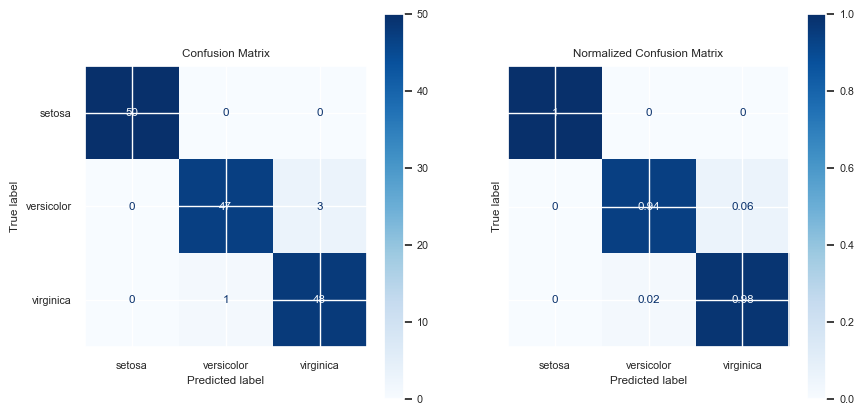

,NAME,TYPE,POLY_DEGREE,ACCURACY,ESTIMATOR
0,LogisticRegression,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...


In [53]:
results, clf = my_grid_search_cv(model=LogisticRegression(), X=df, y=targets, results=results,
                                 param_grid={}, poly_degrees=[1])
results


## Regularization

### Gauss

100% |########################################################################|


MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('standard',
                                                                                           StandardScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('polynomial',
                                                          PolynomialFeatures(degree=1)),
                                                         ('model',
                                                          GaussianProcessClassifier())]),
                              target_transformer=LabelEncoder())

100% |########################################################################|


The model GaussianProcessClassifier() has a degree of accuracy of 91.95%.


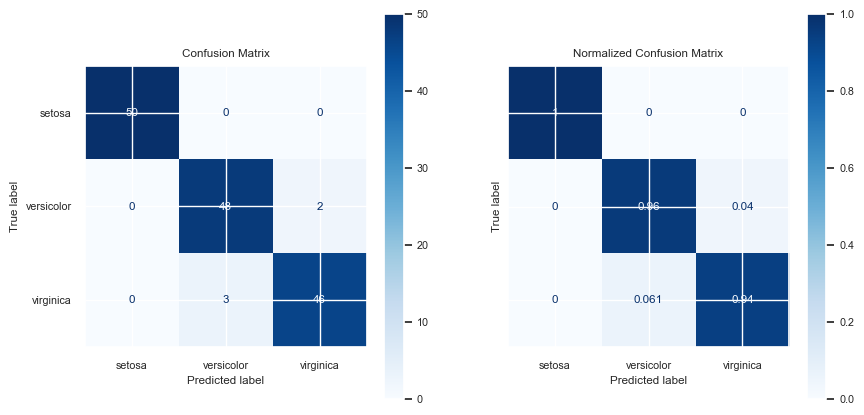

,NAME,TYPE,POLY_DEGREE,ACCURACY,ESTIMATOR
0,LogisticRegression,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
1,GaussianProcessClassifier,ML,1,0.9195,MyTransformedTargetClassifier(classifier=Pipel...


In [54]:
results, clf = my_grid_search_cv(model=GaussianProcessClassifier(), X=df, y=targets, results=results,
                                 param_grid={}, poly_degrees=[1])
results


## Decision Trees

100% |########################################################################|


MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('standard',
                                                                                           StandardScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('polynomial',
                                                          PolynomialFeatures(degree=1)),
                                                         ('model',
                                                          DecisionTreeClassifier(criterion='entropy',
                                                                                 max_depth=14))]),
                              target_transformer=LabelEncoder())

100% |########################################################################|
100% |########################################################################|


The model DecisionTreeClassifier() has a degree of accuracy of 95.28999999999999%.


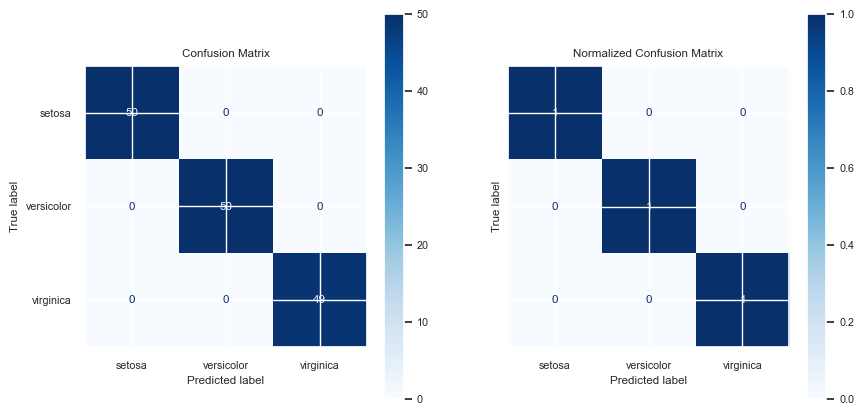

,NAME,TYPE,POLY_DEGREE,ACCURACY,ESTIMATOR
0,LogisticRegression,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
1,GaussianProcessClassifier,ML,1,0.9195,MyTransformedTargetClassifier(classifier=Pipel...
2,DecisionTreeClassifier,ML,1,0.9529,MyTransformedTargetClassifier(classifier=Pipel...


In [55]:
param_grid = {'classifier__model__max_depth': range(1, 20),
              'classifier__model__criterion': ['gini', 'entropy', 'log_loss']}
results, decision_tree_classifier = my_grid_search_cv(model=DecisionTreeClassifier(), X=df, y=targets,
                                                      results=results, param_grid=param_grid, poly_degrees=[1])
results


## Support Vector Machines (SVM)

100% |########################################################################|


MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('standard',
                                                                                           StandardScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('polynomial',
                                                          PolynomialFeatures(degree=1)),
                                                         ('model',
                                                          SVC(C=1000,
                                                              gamma=0.001,
                                                              kernel='linear'))]),
                              target_transformer=LabelEncoder())

100% |########################################################################|
100% |########################################################################|


The model SVC() has a degree of accuracy of 96.67%.


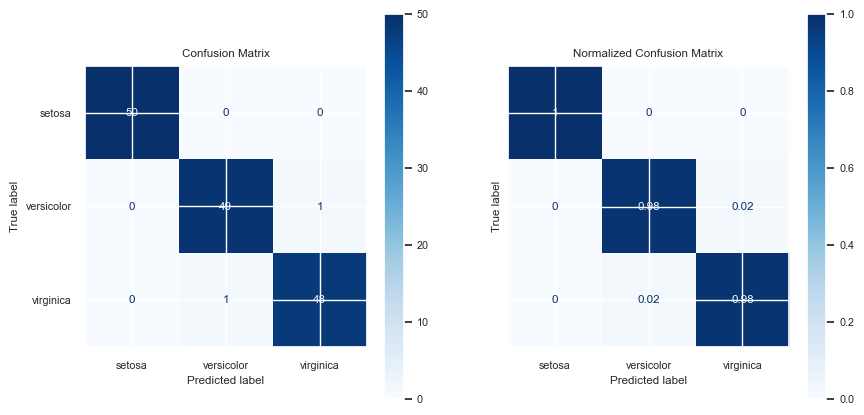

,NAME,TYPE,POLY_DEGREE,ACCURACY,ESTIMATOR
0,LogisticRegression,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
1,GaussianProcessClassifier,ML,1,0.9195,MyTransformedTargetClassifier(classifier=Pipel...
2,DecisionTreeClassifier,ML,1,0.9529,MyTransformedTargetClassifier(classifier=Pipel...
3,SVC,ML,1,0.9667,MyTransformedTargetClassifier(classifier=Pipel...


In [56]:
param_grid = {'classifier__model__kernel': ['linear', 'poly', 'sigmoid', 'rbf'],  # Allows transformation to higher levels.
              # Border complexity: linear, curved.
              'classifier__model__gamma': [1e-3, 1e-2, 0.1],
              'classifier__model__C': [1, 10, 100, 1000]}  # Controls the tradeoff between training errors and hard margins.
results, svc = my_grid_search_cv(model=SVC(), X=df, y=targets, results=results,
                                 param_grid=param_grid, poly_degrees=[1])
results


## K Nearest Neighbors

100% |########################################################################|


MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('standard',
                                                                                           StandardScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('polynomial',
                                                          PolynomialFeatures(degree=1)),
                                                         ('model',
                                                          KNeighborsClassifier(metric='manhattan',
                                                                               n_neighbors=3))]),
                              target_transformer=LabelEncoder())

100% |########################################################################|
100% |########################################################################|


The model KNeighborsClassifier() has a degree of accuracy of 93.95%.


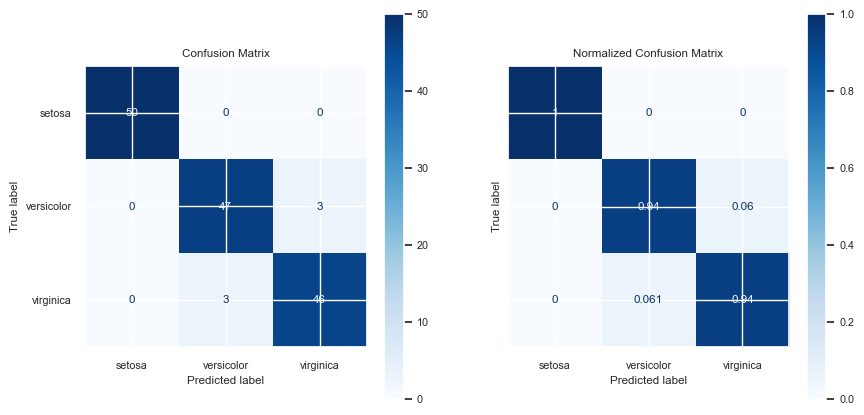

,NAME,TYPE,POLY_DEGREE,ACCURACY,ESTIMATOR
0,LogisticRegression,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
1,GaussianProcessClassifier,ML,1,0.9195,MyTransformedTargetClassifier(classifier=Pipel...
2,DecisionTreeClassifier,ML,1,0.9529,MyTransformedTargetClassifier(classifier=Pipel...
3,SVC,ML,1,0.9667,MyTransformedTargetClassifier(classifier=Pipel...
4,KNeighborsClassifier,ML,1,0.9395,MyTransformedTargetClassifier(classifier=Pipel...


In [57]:
param_grid = {'classifier__model__n_neighbors': range(3, 20, 2),
              'classifier__model__metric': ['euclidean', 'manhattan', 'chebyshev']}
results, k_neighbors_classifier = my_grid_search_cv(model=KNeighborsClassifier(), X=df, y=targets, results=results,
                                                    param_grid=param_grid, poly_degrees=[1])
results


## Naive Bayes

### Gaussian Naive Bayes

100% |########################################################################|


MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('standard',
                                                                                           StandardScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('polynomial',
                                                          PolynomialFeatures(degree=1)),
                                                         ('model',
                                                          GaussianNB())]),
                              target_transformer=LabelEncoder())

100% |########################################################################|
100% |########################################################################|


The model GaussianNB() has a degree of accuracy of 94.67%.


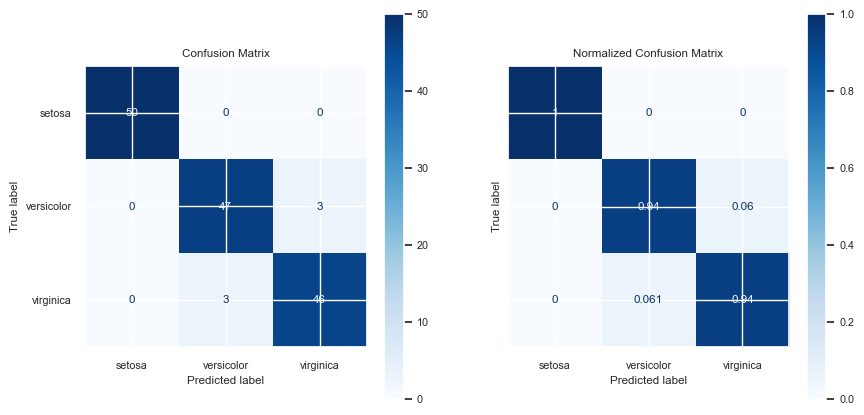

,NAME,TYPE,POLY_DEGREE,ACCURACY,ESTIMATOR
0,LogisticRegression,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
1,GaussianProcessClassifier,ML,1,0.9195,MyTransformedTargetClassifier(classifier=Pipel...
2,DecisionTreeClassifier,ML,1,0.9529,MyTransformedTargetClassifier(classifier=Pipel...
3,SVC,ML,1,0.9667,MyTransformedTargetClassifier(classifier=Pipel...
4,KNeighborsClassifier,ML,1,0.9395,MyTransformedTargetClassifier(classifier=Pipel...
5,GaussianNB,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...


In [58]:
results, gaussian_nb = my_grid_search_cv(model=GaussianNB(), X=df, y=targets, results=results,
                                         param_grid={}, poly_degrees=[1])
results


### Multinomial Naive Bayes

In [59]:
# results, multinomial_nb = my_grid_search_cv(model=MultinomialNB(), X=df, y=targets, results=results,
#                                             param_grid={}, poly_degrees=[1])
# results


### Bernoulli Naive Bayes

100% |########################################################################|


MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('standard',
                                                                                           StandardScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('polynomial',
                                                          PolynomialFeatures(degree=1)),
                                                         ('model',
                                                          BernoulliNB())]),
                              target_transformer=LabelEncoder())

100% |########################################################################|
100% |########################################################################|


The model BernoulliNB() has a degree of accuracy of 77.33%.


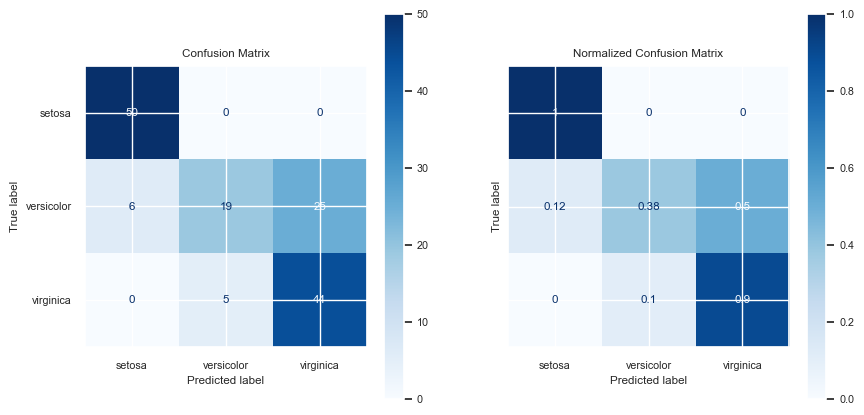

,NAME,TYPE,POLY_DEGREE,ACCURACY,ESTIMATOR
0,LogisticRegression,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
1,GaussianProcessClassifier,ML,1,0.9195,MyTransformedTargetClassifier(classifier=Pipel...
2,DecisionTreeClassifier,ML,1,0.9529,MyTransformedTargetClassifier(classifier=Pipel...
3,SVC,ML,1,0.9667,MyTransformedTargetClassifier(classifier=Pipel...
4,KNeighborsClassifier,ML,1,0.9395,MyTransformedTargetClassifier(classifier=Pipel...
5,GaussianNB,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
6,BernoulliNB,ML,1,0.7733,MyTransformedTargetClassifier(classifier=Pipel...


In [60]:
results, bernoulli_nb = my_grid_search_cv(model=BernoulliNB(), X=df, y=targets, results=results,
                                          param_grid={}, poly_degrees=[1])
results


## Ensemble Methods

### Bagging

100% |########################################################################|


MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('standard',
                                                                                           StandardScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('polynomial',
                                                          PolynomialFeatures(degree=1)),
                                                         ('model',
                                                          BaggingClassifier(estimator=SVC(),
                                                                            n_estimators=3))]),
                              target_transformer=LabelEncoder())

100% |########################################################################|
100% |########################################################################|


The model BaggingClassifier() has a degree of accuracy of 96.0%.


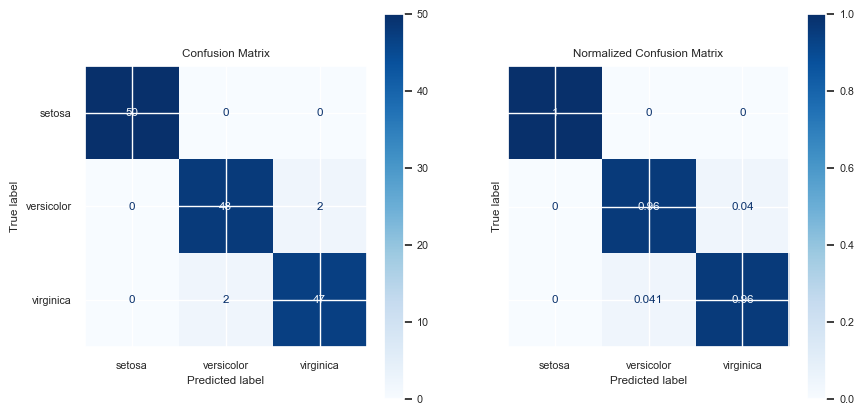

,NAME,TYPE,POLY_DEGREE,ACCURACY,ESTIMATOR
0,LogisticRegression,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
1,GaussianProcessClassifier,ML,1,0.9195,MyTransformedTargetClassifier(classifier=Pipel...
2,DecisionTreeClassifier,ML,1,0.9529,MyTransformedTargetClassifier(classifier=Pipel...
3,SVC,ML,1,0.9667,MyTransformedTargetClassifier(classifier=Pipel...
4,KNeighborsClassifier,ML,1,0.9395,MyTransformedTargetClassifier(classifier=Pipel...
5,GaussianNB,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
6,BernoulliNB,ML,1,0.7733,MyTransformedTargetClassifier(classifier=Pipel...
7,BaggingClassifier,ML,1,0.9600,MyTransformedTargetClassifier(classifier=Pipel...


In [61]:
param_grid = {'classifier__model__estimator': [LogisticRegression(), GaussianProcessClassifier(),
                                               DecisionTreeClassifier(), SVC(), KNeighborsClassifier(),
                                               GaussianNB(), BernoulliNB()],
              'classifier__model__n_estimators': range(1, 21)}
results, bagging_classifier = my_grid_search_cv(model=BaggingClassifier(), X=df, y=targets, results=results,
                                                param_grid=param_grid, poly_degrees=[1])
results


### Boosting

100% |########################################################################|


MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('standard',
                                                                                           StandardScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('polynomial',
                                                          PolynomialFeatures(degree=1)),
                                                         ('model',
                                                          AdaBoostClassifier(estimator=GaussianNB(),
                                                                             n_estimators=1))]),
                              target_transformer=LabelEncoder())

100% |########################################################################|
100% |########################################################################|


The model AdaBoostClassifier() has a degree of accuracy of 94.67%.


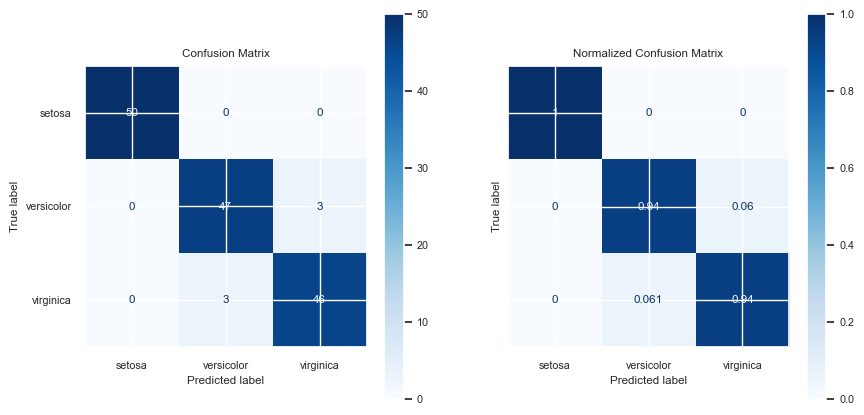

,NAME,TYPE,POLY_DEGREE,ACCURACY,ESTIMATOR
0,LogisticRegression,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
1,GaussianProcessClassifier,ML,1,0.9195,MyTransformedTargetClassifier(classifier=Pipel...
2,DecisionTreeClassifier,ML,1,0.9529,MyTransformedTargetClassifier(classifier=Pipel...
3,SVC,ML,1,0.9667,MyTransformedTargetClassifier(classifier=Pipel...
4,KNeighborsClassifier,ML,1,0.9395,MyTransformedTargetClassifier(classifier=Pipel...
5,GaussianNB,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
6,BernoulliNB,ML,1,0.7733,MyTransformedTargetClassifier(classifier=Pipel...
7,BaggingClassifier,ML,1,0.9600,MyTransformedTargetClassifier(classifier=Pipel...
8,AdaBoostClassifier,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...


In [62]:
param_grid = {'classifier__model__estimator': [LogisticRegression(), DecisionTreeClassifier(),
                                               GaussianNB(), BernoulliNB()],
              'classifier__model__n_estimators': range(1, 21)}
results, boosting_classifier = my_grid_search_cv(model=AdaBoostClassifier(), X=df, y=targets, results=results,
                                                 param_grid=param_grid, poly_degrees=[1])
results


### Gradient Boosting (GBRT)

100% |########################################################################|


MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('standard',
                                                                                           StandardScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('polynomial',
                                                          PolynomialFeatures(degree=1)),
                                                         ('model',
                                                          GradientBoostingClassifier(n_estimators=7))]),
                              target_transformer=LabelEncoder())

100% |########################################################################|
100% |########################################################################|


The model GradientBoostingClassifier() has a degree of accuracy of 93.95%.


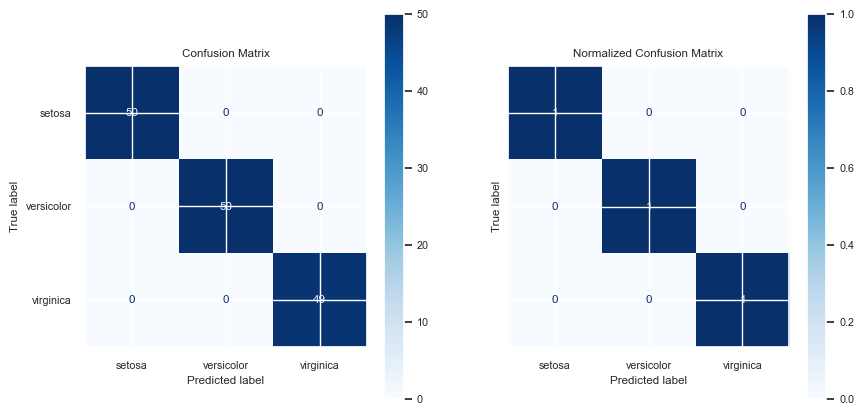

,NAME,TYPE,POLY_DEGREE,ACCURACY,ESTIMATOR
0,LogisticRegression,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
1,GaussianProcessClassifier,ML,1,0.9195,MyTransformedTargetClassifier(classifier=Pipel...
2,DecisionTreeClassifier,ML,1,0.9529,MyTransformedTargetClassifier(classifier=Pipel...
3,SVC,ML,1,0.9667,MyTransformedTargetClassifier(classifier=Pipel...
4,KNeighborsClassifier,ML,1,0.9395,MyTransformedTargetClassifier(classifier=Pipel...
5,GaussianNB,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
6,BernoulliNB,ML,1,0.7733,MyTransformedTargetClassifier(classifier=Pipel...
7,BaggingClassifier,ML,1,0.9600,MyTransformedTargetClassifier(classifier=Pipel...
8,AdaBoostClassifier,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
9,GradientBoostingClassifier,ML,1,0.9395,MyTransformedTargetClassifier(classifier=Pipel...


In [63]:
param_grid = {'classifier__model__n_estimators': range(1, 21)}
results, gradient_boosting_regressor = my_grid_search_cv(model=GradientBoostingClassifier(), X=df, y=targets,
                                                         results=results, param_grid=param_grid, poly_degrees=[1])
results


### Random Forests

100% |########################################################################|


MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('standard',
                                                                                           StandardScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('polynomial',
                                                          PolynomialFeatures(degree=1)),
                                                         ('model',
                                                          RandomForestClassifier(n_estimators=15))]),
                              target_transformer=LabelEncoder())

100% |########################################################################|
100% |########################################################################|


The model RandomForestClassifier() has a degree of accuracy of 95.95%.


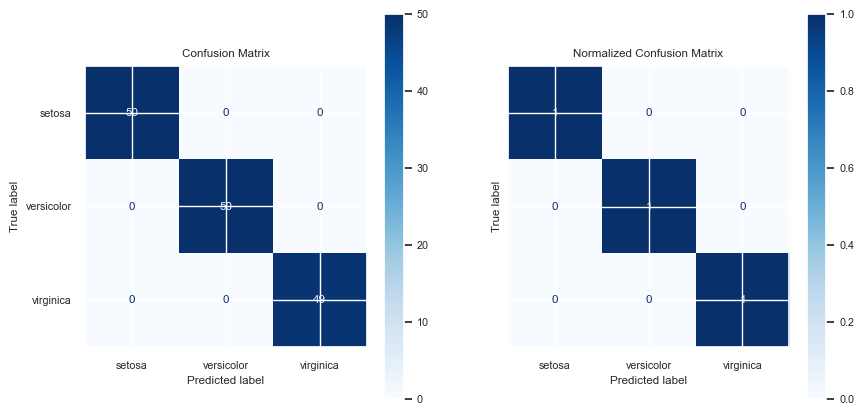

,NAME,TYPE,POLY_DEGREE,ACCURACY,ESTIMATOR
0,LogisticRegression,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
1,GaussianProcessClassifier,ML,1,0.9195,MyTransformedTargetClassifier(classifier=Pipel...
2,DecisionTreeClassifier,ML,1,0.9529,MyTransformedTargetClassifier(classifier=Pipel...
3,SVC,ML,1,0.9667,MyTransformedTargetClassifier(classifier=Pipel...
4,KNeighborsClassifier,ML,1,0.9395,MyTransformedTargetClassifier(classifier=Pipel...
5,GaussianNB,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
6,BernoulliNB,ML,1,0.7733,MyTransformedTargetClassifier(classifier=Pipel...
7,BaggingClassifier,ML,1,0.9600,MyTransformedTargetClassifier(classifier=Pipel...
8,AdaBoostClassifier,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
9,GradientBoostingClassifier,ML,1,0.9395,MyTransformedTargetClassifier(classifier=Pipel...


In [64]:
param_grid = {'classifier__model__n_estimators': range(1, 21)}
results, random_forest_regressor = my_grid_search_cv(model=RandomForestClassifier(), X=df, y=targets,
                                                     results=results, param_grid=param_grid, poly_degrees=[1])
results


## Learning Curves

In [65]:
train_sizes, train_scores, test_scores = learning_curve(clf, df, targets, cv=5, n_jobs=-1, scoring='accuracy',
                                                        train_sizes=np.linspace(0.01, 1., 10))
train_sizes.shape, train_scores.shape, test_scores.shape


((10,), (10, 5), (10, 5))

In [66]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_mean


array([       nan,        nan,        nan,        nan, 0.97735849,
       1.        , 0.98227848, 0.98478261, 0.96      , 0.96470588])

In [67]:
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_mean


array([       nan,        nan,        nan,        nan, 0.5       ,
       0.66666667, 0.66666667, 0.66      , 0.84344828, 0.87149425])

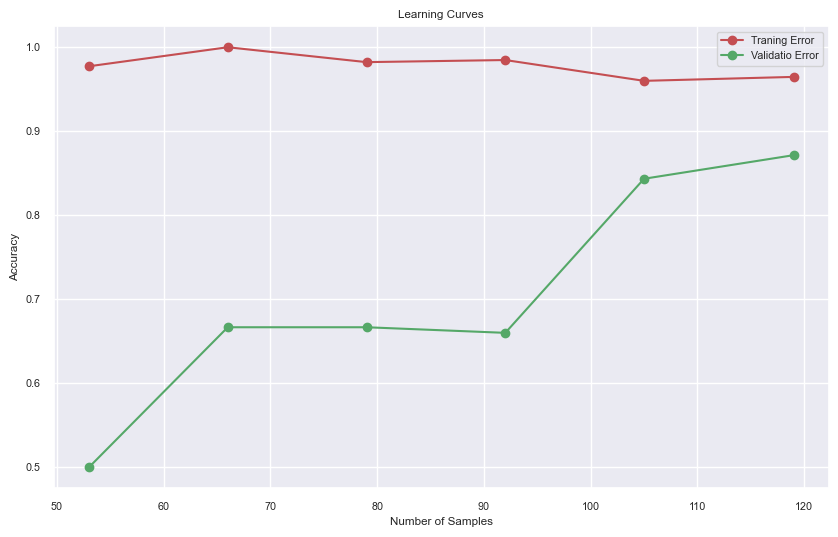

In [68]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.rc('figure', figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-',
         color='r', label='Traning Error')
plt.plot(train_sizes, test_scores_mean, 'o-',
         color='g', label='Validatio Error')

plt.title('Learning Curves')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')

plt.legend()


Shortcode for all estimators.

In [69]:
results_model_key = results.copy()
results_model_key.set_index('NAME', inplace=True)


@interact(model=results_model_key.index)
def _(model):
    plt.rc('figure', figsize=(10, 6))

    train_sizes, train_scores, test_scores = learning_curve(results_model_key.loc[model].ESTIMATOR, df, targets, cv=5,
                                                            n_jobs=-1, train_sizes=np.linspace(0.01, 1., 10),
                                                            scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-',
             color='r', label='Traning error')
    plt.plot(train_sizes, test_scores_mean, 'o-',
             color='g', label='Validatio error')

    plt.title(f'Learning Curves: {model}')
    plt.xlabel('Number of Samples')
    plt.ylabel('Accuracy')

    plt.legend()
    plt.show()


interactive(children=(Dropdown(description='model', options=('LogisticRegression', 'GaussianProcessClassifier'…

## Validation Curves

Los hiperparámetros ya fueron seleccionados en cada uno de los algoritmos mediante `GridSearchCV`.

# Deep Learning

Cuda version.

In [70]:
print(f'Tensorflow version: {tf.__version__}')
print(f"Cuda version: {build.build_info['cuda_version']}")
print(f"Cudnn version: {build.build_info['cudnn_version']}")


Tensorflow version: 2.6.0
Cuda version: 64_113
Cudnn version: 64_8


**Enable GPU**

- The environment must be created with a version of Python compatible with the operation of Tensorflow and its use of the GPU (https://www.tensorflow.org/install/pip#virtual-environment-install).
- Before installing tensorflow-gpu you must install CUDA Toolkit and cuDNN from official NVIDIA site.
- Anaconda must be restarted after installing tensorflow-gpu.

In [71]:
# !conda install -y tensorflow-gpu keras-gpu

if len(tf.config.list_physical_devices('GPU')) == 0:
    raise SystemExit('Restart Anaconda to activate the GPU.')
else:
    print('GPU activated.')


GPU activated.


Available hardware.

In [72]:
tf.config.get_visible_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Available hardware details.

In [73]:
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5402982745227841519,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2236245607
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9843325096827163101
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"]

## Tensorboard

In [74]:
# !rm -rf logs/


In [75]:
# %load_ext tensorboard
# %tensorboard --logdir logs

# if error: eliminar .tensorboard-info en C:\Users\%username%\AppData\Local\Temp


In [76]:
tensorboard = TensorBoard(os.path.join('logs', datetime.now().strftime('%Y%m%d-%H%M%S')), histogram_freq=1,
                          write_graph=True, write_images=True, update_freq='epoch', profile_batch=2, embeddings_freq=1)


## Preprocess

In [77]:
df = outlier_transf.fit_transform(df)
df = impute_transf.fit_transform(df)
df = data_transf.fit_transform(df)
df.head()


100% |########################################################################|


,SEPAL_LENGHT,SEPAL_WIDTH,PETAL_LENGHT,PETAL_WIDTH,TARGET
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [78]:
preprocessor_resume = pd.DataFrame(data=df.dtypes, columns=['TYPE'])
preprocessor_resume['VALUES'] = preprocessor_resume.apply(lambda x: df[x.name].unique(),
                                                          axis=1)
preprocessor_resume['VALUES_LEN'] = preprocessor_resume.apply(lambda x: len(df[x.name].unique()),
                                                              axis=1)
preprocessor_resume[['TRANSFORMER', 'STATE']] = 'UNKNOWN'
# ------------------------------------------------------------------------------------------------------------------
min_max_feat = ['SEPAL_LENGHT', 'SEPAL_WIDTH', 'PETAL_LENGHT', 'PETAL_WIDTH']
one_hot_feat = []
ordinal_feat = []

preprocessor_resume.loc[min_max_feat, 'TRANSFORMER'] = 'MIX_MAX_SCALER'
preprocessor_resume.loc[one_hot_feat, 'TRANSFORMER'] = 'ONE_HOT_ENCODER'
preprocessor_resume.loc[ordinal_feat, 'TRANSFORMER'] = 'ORDINAL_ENCODER'
# ------------------------------------------------------------------------------------------------------------------
preprocessor = ColumnTransformer(transformers=[('min_max',
                                                MinMaxScaler(feature_range=(0, 1)), min_max_feat)])

preprocessor_resume.loc[min_max_feat + one_hot_feat + ordinal_feat,
                        'STATE'] = 'OK'
# ------------------------------------------------------------------------------------------------------------------
X = preprocessor.fit_transform(X=df)

features_out = [f.split('__')[1] for f in preprocessor.get_feature_names_out()]
print('features_out:', ', '.join(features_out))

display(preprocessor)
display(preprocessor_resume)

print(f'Dimensiones de los datos: {X.shape}.')
input_dim = X.shape[1]
del X


features_out: SEPAL_LENGHT, SEPAL_WIDTH, PETAL_LENGHT, PETAL_WIDTH


ColumnTransformer(transformers=[('min_max', MinMaxScaler(),
                                 ['SEPAL_LENGHT', 'SEPAL_WIDTH', 'PETAL_LENGHT',
                                  'PETAL_WIDTH'])])

,TYPE,VALUES,VALUES_LEN,TRANSFORMER,STATE
SEPAL_LENGHT,float64,"[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, ...",35,MIX_MAX_SCALER,OK
SEPAL_WIDTH,float64,"[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, ...",22,MIX_MAX_SCALER,OK
PETAL_LENGHT,float64,"[1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, ...",43,MIX_MAX_SCALER,OK
PETAL_WIDTH,float64,"[0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, ...",22,MIX_MAX_SCALER,OK
TARGET,category,"['Setosa', 'Versicolor', 'Virginica'] Categori...",3,UNKNOWN,UNKNOWN


Dimensiones de los datos: (149, 4).


In [79]:
df = outlier_transf.inverse_transform(df, inv_outlier_transf_df)
df = impute_transf.inverse_transform(df, inv_impute_transf_df)
df = data_transf.inverse_transform(df, inv_data_transf_df)
df.head()


,SEPAL_LENGHT,SEPAL_WIDTH,PETAL_LENGHT,PETAL_WIDTH,TARGET
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Keras - Multilayer Perceptron (MLP)

Training and test data are generated.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df, targets, test_size=0.2,
                                                    shuffle=True)


In [81]:
with tf.device('/GPU:0'):
    # clasificación binaria: activation sigmoid en la ultima capa y binary_crossentropy como loss.
    # clasificación multiclase: activation softmax en la ultima capa y categorical_crossentropy como loss.

    # Clear backend
    backend.clear_session()

    keras_model = Sequential([Dense(units=20, activation='relu', kernel_constraint=maxnorm(max_value=3),
                                    input_dim=input_dim),
                              Dropout(rate=0.2),

                              Dense(units=20, activation='relu',
                                    kernel_constraint=maxnorm(max_value=3)),
                              Dropout(rate=0.2),

                              Dense(units=3, activation='softmax')])

    # https://fmorenovr.medium.com/sparse-categorical-cross-entropy-vs-categorical-cross-entropy-ea01d0392d28

    keras_model.compile(optimizer=Adam(),                   # optimizer
                        loss='categorical_crossentropy',    # función de pérdida o coste
                        metrics=['accuracy'])               # Metrics to observe the evolution of the model training

    display(keras_model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                100       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 63        
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________


None

In [82]:
pipe = Pipeline(steps=[('outlier', IrisOutlierTransformer()),
                       ('imputer', IrisImputeTransformer()),
                       ('transformer', IrisDataTransformer()),
                       ('preprocessor', preprocessor),
                       ('model', keras_model)])

target_transformer = OneHotEncoder(sparse_output=False)

keras_estimator = MyTransformedTargetClassifier(classifier=pipe,
                                                target_transformer=target_transformer)

X_val = outlier_transf.fit_transform(X=X_test)
X_val = impute_transf.fit_transform(X=X_val)
X_val = data_transf.fit_transform(X=X_val)
X_val = preprocessor.fit_transform(X=X_val)

y_test_re = np.reshape(y_test.values, (-1, 1))
y_val = target_transformer.fit_transform(y_test_re)

keras_estimator.fit(X_train, y_train, model__batch_size=64, model__epochs=100, model__verbose=1,
                    model__shuffle=True, model__callbacks=[],
                    model__validation_data=(X_val, y_val))


100% |########################################################################|
100% |########################################################################|


Epoch 1/100
2/2 [==============================] - 2s 226ms/step - loss: 1.0494 - accuracy: 0.3782 - val_loss: 1.0814 - val_accuracy: 0.2333
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 1.0582 - accuracy: 0.3613 - val_loss: 1.0721 - val_accuracy: 0.2333
Epoch 3/100
2/2 [==============================] - 0s 30ms/step - loss: 1.0578 - accuracy: 0.4118 - val_loss: 1.0635 - val_accuracy: 0.2333
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 1.0223 - accuracy: 0.4118 - val_loss: 1.0551 - val_accuracy: 0.2333
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 1.0259 - accuracy: 0.4118 - val_loss: 1.0474 - val_accuracy: 0.2333
Epoch 6/100
2/2 [==============================] - 0s 28ms/step - loss: 1.0027 - accuracy: 0.4286 - val_loss: 1.0401 - val_accuracy: 0.2333
Epoch 7/100
2/2 [==============================] - 0s 31ms/step - loss: 1.0091 - accuracy: 0.3950 - val_loss: 1.0328 - val_accuracy: 0.2667
Epoch 8/100
2/2 [==

MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('min_max',
                                                                                           MinMaxScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('model',
                                                          <keras.engine.sequential.Sequential object at 0x000001FA213D2EB0>)]),
                              target_transformer=OneHotEncoder(sparse_output=False))

Analyzing the training and evaluation data.

In [83]:
keras_model = keras_estimator.classifier['model']

historial_train = keras_model.history
hist = pd.DataFrame(historial_train.history)
hist['epoch'] = historial_train.epoch
hist.tail()


,loss,accuracy,val_loss,val_accuracy,epoch
95,0.513375,0.747899,0.463820,0.7,95
96,0.488266,0.781513,0.461446,0.7,96
97,0.455142,0.789916,0.459484,0.7,97
98,0.448289,0.789916,0.457688,0.7,98
99,0.502979,0.756303,0.454919,0.7,99


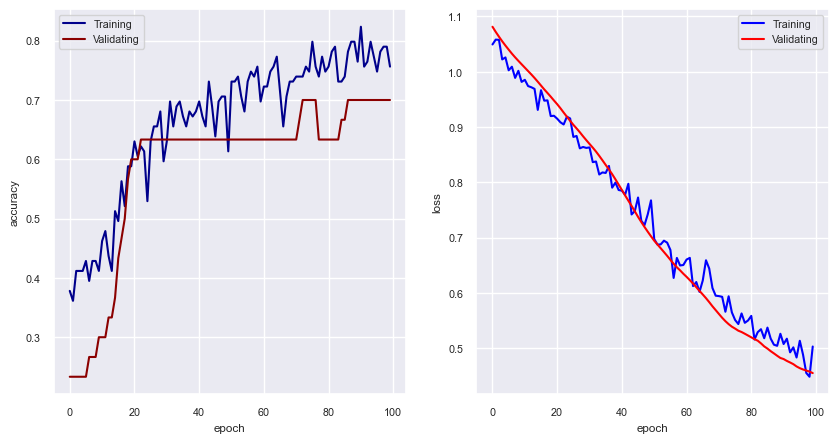

In [84]:
def plot_metrics(train):
    plt.figure(figsize=(10, 5))

    ax1 = plt.subplot(1, 2, 1)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.plot(train.history['accuracy'], color='darkblue', label='Training')
    ax1.plot(train.history['val_accuracy'],
             color='darkred', label='Validating')
    ax1.legend()

    ax1 = plt.subplot(1, 2, 2)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.plot(train.history['loss'], color='blue', label='Training')
    ax1.plot(train.history['val_loss'], color='red', label='Validating')
    ax1.legend()


plot_metrics(historial_train)


Model evaluation.

In [85]:
acc_train = accuracy_score(y_train, keras_estimator.predict(X=X_train))
acc_test = accuracy_score(y_test, keras_estimator.predict(X=X_test))

acc_train, acc_test = round(acc_train, 4), round(acc_test, 4)

print(f'\nAccuracy Train: {acc_train}')
print(f'Accuracy Test: {acc_test}')


100% |########################################################################|
100% |########################################################################|



Accuracy Train: 0.916
Accuracy Test: 0.8333


In [86]:
keras_estimator


MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('min_max',
                                                                                           MinMaxScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('model',
                                                          <keras.engine.sequential.Sequential object at 0x000001FA213D2EB0>)]),
                              target_transformer=OneHotEncoder(sparse_output=False))

In [87]:
new_df = pd.DataFrame(data={'NAME': ['Keras (MLP)'], 'TYPE': 'DL', 'POLY_DEGREE': 0,
                            'ACCURACY': [acc_test], 'ESTIMATOR': [keras_estimator]})
results = pd.concat([results, new_df], ignore_index=True)
results


,NAME,TYPE,POLY_DEGREE,ACCURACY,ESTIMATOR
0,LogisticRegression,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
1,GaussianProcessClassifier,ML,1,0.9195,MyTransformedTargetClassifier(classifier=Pipel...
2,DecisionTreeClassifier,ML,1,0.9529,MyTransformedTargetClassifier(classifier=Pipel...
3,SVC,ML,1,0.9667,MyTransformedTargetClassifier(classifier=Pipel...
4,KNeighborsClassifier,ML,1,0.9395,MyTransformedTargetClassifier(classifier=Pipel...
5,GaussianNB,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
6,BernoulliNB,ML,1,0.7733,MyTransformedTargetClassifier(classifier=Pipel...
7,BaggingClassifier,ML,1,0.9600,MyTransformedTargetClassifier(classifier=Pipel...
8,AdaBoostClassifier,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
9,GradientBoostingClassifier,ML,1,0.9395,MyTransformedTargetClassifier(classifier=Pipel...


# Resume

In [88]:
results_sort = results.sort_values(by=['ACCURACY'], ascending=[False])
results_sort


,NAME,TYPE,POLY_DEGREE,ACCURACY,ESTIMATOR
3,SVC,ML,1,0.9667,MyTransformedTargetClassifier(classifier=Pipel...
7,BaggingClassifier,ML,1,0.9600,MyTransformedTargetClassifier(classifier=Pipel...
10,RandomForestClassifier,ML,1,0.9595,MyTransformedTargetClassifier(classifier=Pipel...
2,DecisionTreeClassifier,ML,1,0.9529,MyTransformedTargetClassifier(classifier=Pipel...
0,LogisticRegression,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
5,GaussianNB,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
8,AdaBoostClassifier,ML,1,0.9467,MyTransformedTargetClassifier(classifier=Pipel...
4,KNeighborsClassifier,ML,1,0.9395,MyTransformedTargetClassifier(classifier=Pipel...
9,GradientBoostingClassifier,ML,1,0.9395,MyTransformedTargetClassifier(classifier=Pipel...
1,GaussianProcessClassifier,ML,1,0.9195,MyTransformedTargetClassifier(classifier=Pipel...


<AxesSubplot: ylabel='NAME'>

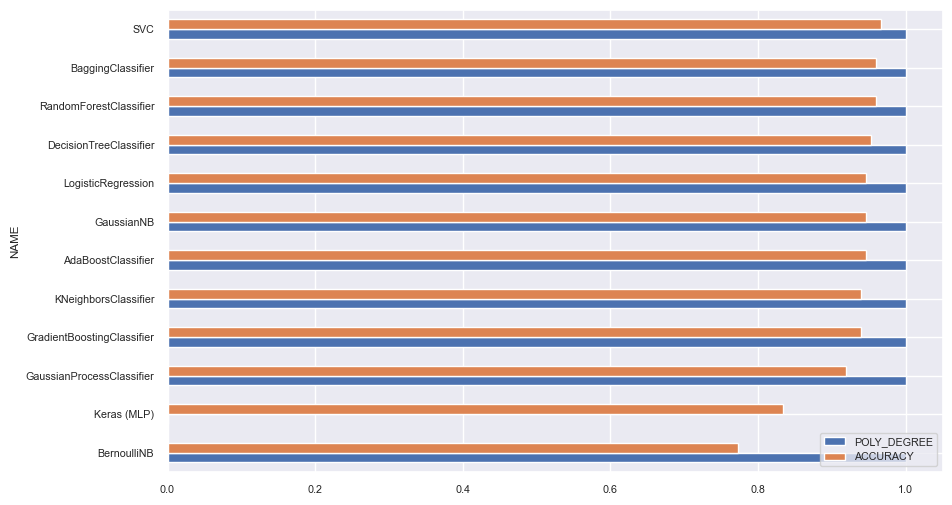

In [89]:
plt.rc('figure', figsize=(10, results_sort.shape[0]*.5))
results_sort[::-1].set_index('NAME').plot.barh(rot=0)


In [90]:
print(
    f'Best tentative algorithm "{results_sort.iloc[0].NAME}" with ACCURACY={results_sort.iloc[0].ACCURACY}.')


Best tentative algorithm "SVC" with ACCURACY=0.9667.


In [91]:
best_sklearn_model = results_sort[results_sort.TYPE == 'ML'].iloc[0].ESTIMATOR
best_keras_model = results_sort[results_sort.TYPE == 'DL'].iloc[0].ESTIMATOR


## Export

Save to file.

In [92]:
sklearn_model_filename = 'resources/sklearn_model.pkl'
keras_model_folder = 'resources/keras_model'

pickle.dump(best_sklearn_model, open(sklearn_model_filename, 'wb'))
best_keras_model.save(keras_model_folder)


Load from file.

In [93]:
sklearn_model_loaded = pickle.load(open(sklearn_model_filename, 'rb'))
keras_model_loaded = MyTransformedTargetClassifier.load(keras_model_folder)

display(sklearn_model_loaded, keras_model_loaded)


MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('standard',
                                                                                           StandardScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('polynomial',
                                                          PolynomialFeatures(degree=1)),
                                                         ('model',
                                                          SVC(C=1000,
                                                              gamma=0.001,
                                                              kernel='linear'))]),
                              target_transformer=LabelEncoder())

MyTransformedTargetClassifier(classifier=Pipeline(steps=[('outlier',
                                                          IrisOutlierTransformer()),
                                                         ('imputer',
                                                          IrisImputeTransformer()),
                                                         ('transformer',
                                                          IrisDataTransformer()),
                                                         ('preprocessor',
                                                          ColumnTransformer(transformers=[('min_max',
                                                                                           MinMaxScaler(),
                                                                                           ['SEPAL_LENGHT',
                                                                                            'SEPAL_WIDTH',
                                                                                            'PETAL_LENGHT',
                                                                                            'PETAL_WIDTH'])])),
                                                         ('model',
                                                          <keras.engine.sequential.Sequential object at 0x000001FA214F2FA0>)]),
                              target_transformer=OneHotEncoder(sparse_output=False))

## Predict

In [94]:
_X = df.sample(20)
# _X = df[:20]

pred_df = pd.DataFrame(data={'REAL': _X[target_column],
                             'SKLEARN_PRED': sklearn_model_loaded.predict(X=_X),
                             'KERAS_PRED': keras_model_loaded.predict(X=_X)})

pred_df


100% |########################################################################|
100% |########################################################################|


,REAL,SKLEARN_PRED,KERAS_PRED
87,Versicolor,Versicolor,Virginica
32,Setosa,Setosa,Setosa
67,Versicolor,Versicolor,Versicolor
76,Versicolor,Versicolor,Virginica
7,Setosa,Setosa,Setosa
4,Setosa,Setosa,Setosa
30,Setosa,Setosa,Setosa
131,Virginica,Virginica,Virginica
136,Virginica,Virginica,Virginica
104,Virginica,Virginica,Virginica
